In [218]:
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib ;  import matplotlib.pyplot as plt
# 데이터 시각화:추세, 산점도 행렬 
import seaborn as sns
import datetime as dt

In [219]:
sales = pd.read_csv("B1_유통(BtoB)/01_sales_data.csv")
customer = pd.read_csv("B1_유통(BtoB)/02_customer_data.csv")
stock = pd.read_csv("B1_유통(BtoB)/03_stock_data.csv")

In [220]:
sales

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5
...,...,...,...,...,...,...,...,...
258637,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4
258638,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6
258639,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0
258640,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8


In [194]:
sales1 = pd.merge(sales, customer, on=['customer_id'],how ='left')

In [195]:
sales1

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258637,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east
258638,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south
258639,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south
258640,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south


<AxesSubplot:xlabel='city'>

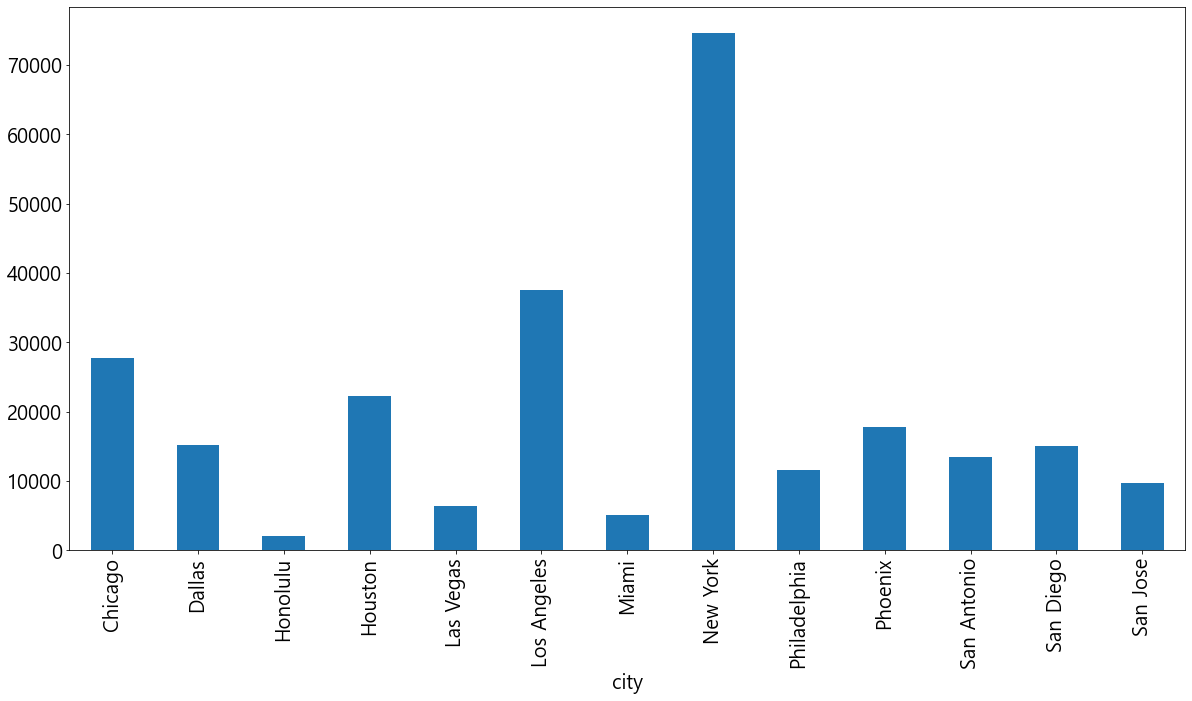

In [196]:
df_count1 = sales1.groupby(['city']).size()
df_count1.plot.bar(figsize = (20,10))

In [197]:
df_count1

city
Chicago         27791
Dallas          15240
Honolulu         2034
Houston         22211
Las Vegas        6460
Los Angeles     37534
Miami            5070
New York        74652
Philadelphia    11633
Phoenix         17731
San Antonio     13525
San Diego       15046
San Jose         9715
dtype: int64

In [198]:
df_count1 = pd.DataFrame(df_count1)
df_count1

,0
city,
Chicago,27791
Dallas,15240
Honolulu,2034
Houston,22211
Las Vegas,6460
Los Angeles,37534
Miami,5070
New York,74652
Philadelphia,11633


In [199]:
df_count1 = pd.merge(df_count1,customer, on=['city'],how ='left')
df_count1

,city,0,customer_id,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn
0,Chicago,27791,E13963,IL,2671,589,middle,metro,east
1,Chicago,27791,E17188,IL,2671,589,middle,metro,east
2,Chicago,27791,E16814,IL,2671,589,middle,metro,east
3,Chicago,27791,E16145,IL,2671,589,middle,metro,east
4,Chicago,27791,E18109,IL,2671,589,middle,metro,east
...,...,...,...,...,...,...,...,...,...
3453,San Jose,9715,E15539,CA,1003,461,middle,sightseeing,west
3454,San Jose,9715,E14219,CA,1003,461,middle,sightseeing,west
3455,San Jose,9715,E15274,CA,1003,461,middle,sightseeing,west
3456,San Jose,9715,E16313,CA,1003,461,middle,sightseeing,west


In [363]:
df_count1[0]

0       27791
1       27791
2       27791
3       27791
4       27791
        ...  
3453     9715
3454     9715
3455     9715
3456     9715
3457     9715
Name: 0, Length: 3458, dtype: int64

In [364]:
df_count1['pop_thousand']

0       2671
1       2671
2       2671
3       2671
4       2671
        ... 
3453    1003
3454    1003
3455    1003
3456    1003
3457    1003
Name: pop_thousand, Length: 3458, dtype: int64

In [365]:
df_count1['person_sale'] = df_count1[0]/df_count1['pop_thousand']
df_count1

,city,0,customer_id,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,person_sale
0,Chicago,27791,E13963,IL,2671,589,middle,metro,east,10.404717
1,Chicago,27791,E17188,IL,2671,589,middle,metro,east,10.404717
2,Chicago,27791,E16814,IL,2671,589,middle,metro,east,10.404717
3,Chicago,27791,E16145,IL,2671,589,middle,metro,east,10.404717
4,Chicago,27791,E18109,IL,2671,589,middle,metro,east,10.404717
...,...,...,...,...,...,...,...,...,...,...
3453,San Jose,9715,E15539,CA,1003,461,middle,sightseeing,west,9.685942
3454,San Jose,9715,E14219,CA,1003,461,middle,sightseeing,west,9.685942
3455,San Jose,9715,E15274,CA,1003,461,middle,sightseeing,west,9.685942
3456,San Jose,9715,E16313,CA,1003,461,middle,sightseeing,west,9.685942


In [366]:
df_city=df_count1[['city','person_sale']]

In [367]:
df_city = df_city.drop_duplicates()
df_city.set_index('city',inplace = True)

<AxesSubplot:xlabel='city'>

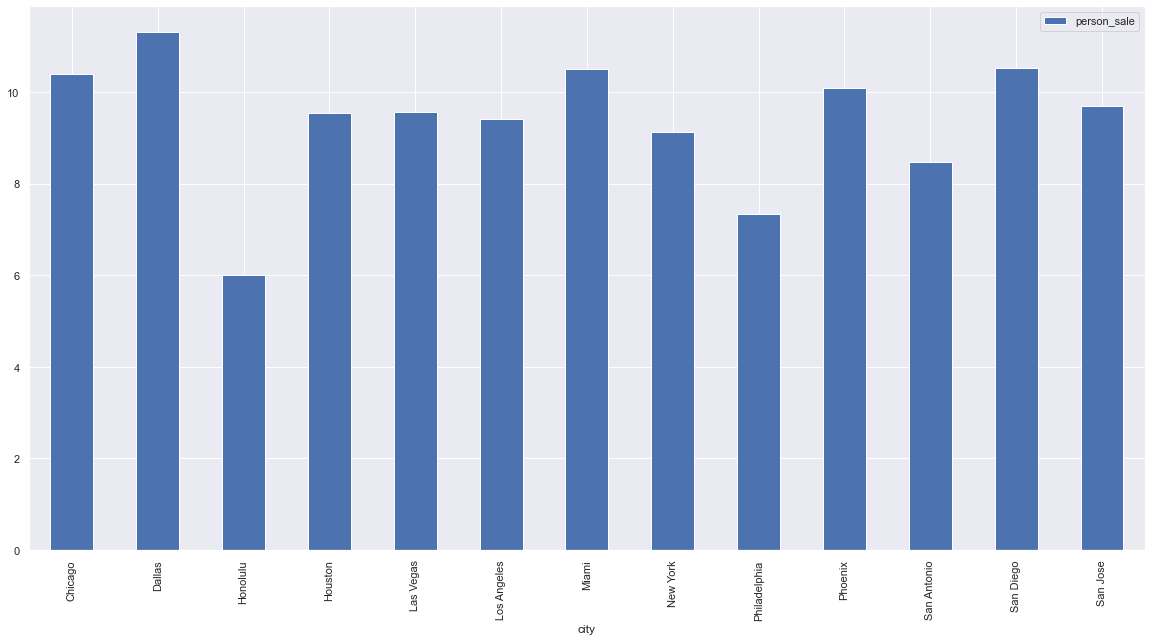

In [368]:
df_city.plot.bar(figsize = (20,10))


In [369]:
df2= sales1[['city','sales']]
df2

,city,sales
0,Honolulu,19.5
1,Honolulu,10.5
2,Honolulu,10.5
3,Honolulu,10.5
4,Honolulu,12.5
...,...,...
258637,New York,23.4
258638,San Antonio,23.6
258639,San Antonio,30.0
258640,San Antonio,214.8


In [370]:
df3= sales1.groupby(['city'])['sales'].sum()
df3

city
Chicago          422364.460
Dallas           225708.560
Honolulu          33684.120
Houston          432643.610
Las Vegas        119326.590
Los Angeles      771286.772
Miami             94168.250
New York        1500942.042
Philadelphia     226335.140
Phoenix          379308.110
San Antonio      249419.120
San Diego        457493.950
San Jose         181022.690
Name: sales, dtype: float64

In [371]:
df3= pd.DataFrame(df3)
df3

,sales
city,
Chicago,422364.460
Dallas,225708.560
Honolulu,33684.120
Houston,432643.610
Las Vegas,119326.590
Los Angeles,771286.772
Miami,94168.250
New York,1500942.042
Philadelphia,226335.140


In [372]:
df5 = pd.merge(df3,customer, on=['city'],how ='left')
df5

,city,sales,customer_id,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn
0,Chicago,422364.46,E13963,IL,2671,589,middle,metro,east
1,Chicago,422364.46,E17188,IL,2671,589,middle,metro,east
2,Chicago,422364.46,E16814,IL,2671,589,middle,metro,east
3,Chicago,422364.46,E16145,IL,2671,589,middle,metro,east
4,Chicago,422364.46,E18109,IL,2671,589,middle,metro,east
...,...,...,...,...,...,...,...,...,...
3453,San Jose,181022.69,E15539,CA,1003,461,middle,sightseeing,west
3454,San Jose,181022.69,E14219,CA,1003,461,middle,sightseeing,west
3455,San Jose,181022.69,E15274,CA,1003,461,middle,sightseeing,west
3456,San Jose,181022.69,E16313,CA,1003,461,middle,sightseeing,west


In [373]:
df5['person_sale']= df5['sales']/df5['pop_thousand']

In [374]:
df5

,city,sales,customer_id,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,person_sale
0,Chicago,422364.46,E13963,IL,2671,589,middle,metro,east,158.129712
1,Chicago,422364.46,E17188,IL,2671,589,middle,metro,east,158.129712
2,Chicago,422364.46,E16814,IL,2671,589,middle,metro,east,158.129712
3,Chicago,422364.46,E16145,IL,2671,589,middle,metro,east,158.129712
4,Chicago,422364.46,E18109,IL,2671,589,middle,metro,east,158.129712
...,...,...,...,...,...,...,...,...,...,...
3453,San Jose,181022.69,E15539,CA,1003,461,middle,sightseeing,west,180.481246
3454,San Jose,181022.69,E14219,CA,1003,461,middle,sightseeing,west,180.481246
3455,San Jose,181022.69,E15274,CA,1003,461,middle,sightseeing,west,180.481246
3456,San Jose,181022.69,E16313,CA,1003,461,middle,sightseeing,west,180.481246


In [375]:
df5= df5[['city','person_sale']]

In [376]:
df5 = df5.drop_duplicates()


In [377]:
df5

,city,person_sale
0,Chicago,158.129712
344,Dallas,167.439585
530,Honolulu,99.363186
574,Houston,186.083273
852,Las Vegas,176.780133
940,Los Angeles,193.547496
1453,Miami,194.965321
1511,New York,183.556566
2511,Philadelphia,142.798196
2695,Phoenix,215.638493


In [378]:
df5.set_index('city',inplace = True)

<AxesSubplot:xlabel='city'>

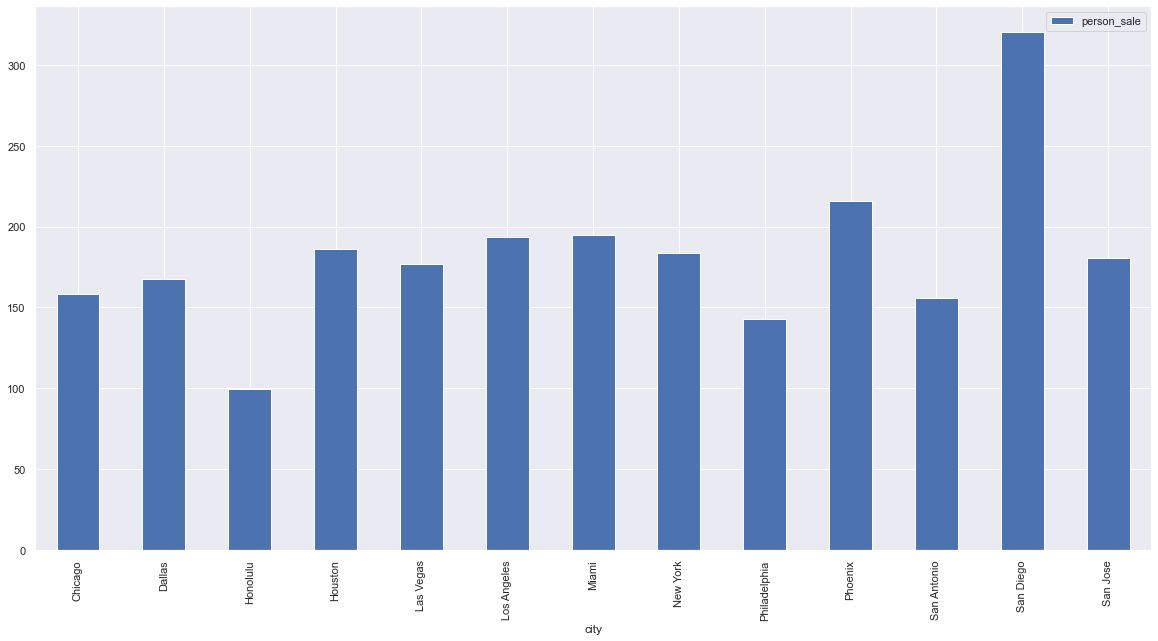

In [379]:
df5.plot.bar(figsize = (20,10))

<AxesSubplot:xlabel='city'>

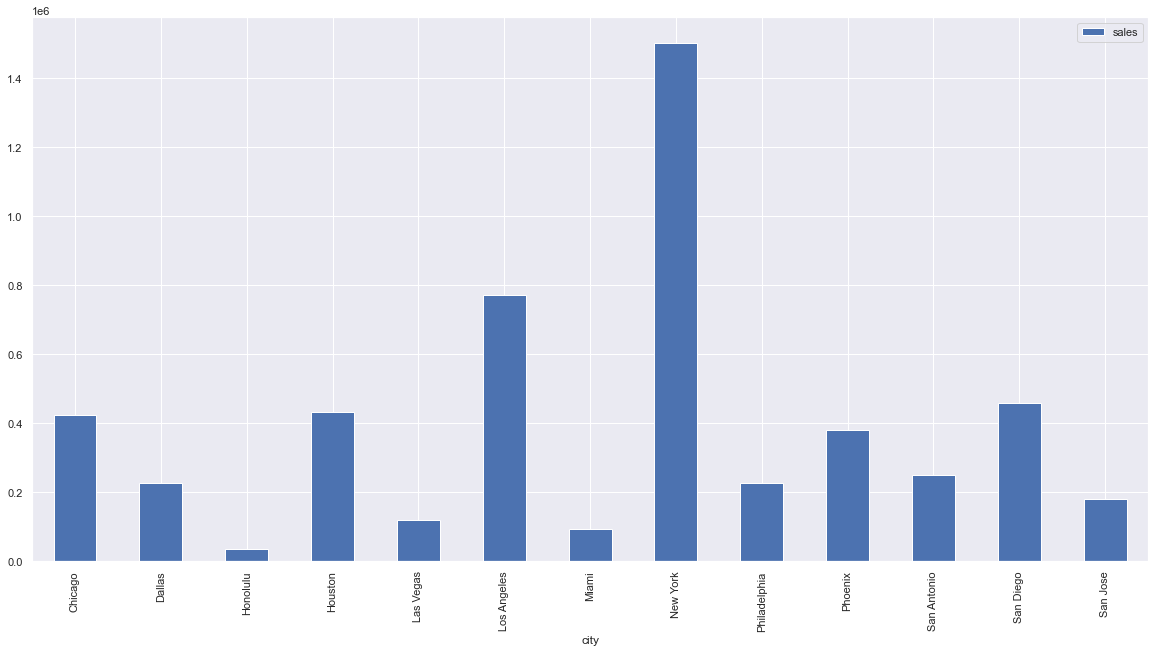

In [380]:
df3.plot.bar(figsize = (20,10))

In [403]:
df4= sales1[['city','customer_id']]
df4.drop_duplicates(inplace= True)


<ipython-input-403-4db36f82dafa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop_duplicates(inplace= True)


<bound method DataFrame.count of                city customer_id
0          Honolulu      E13313
17          Houston      E18097
26         San Jose      E16656
30          Phoenix      E16875
52          Phoenix      E13094
...             ...         ...
256484    Las Vegas      E14698
256745    San Diego      E13298
257464     New York      E14569
257571      Phoenix      E16688
258007  Los Angeles      E12985

[3458 rows x 2 columns]>

In [409]:
df4 = df4['city'].value_counts()
df4
# df4 = pd.DataFrame(df4)
# df4

KeyError: 'city'

In [ ]:
df4 = pd.merge(df4, df5, on=['product_name'],how ='left')
sales2

In [402]:
sales2 = pd.merge(sales1, stock, on=['product_name'],how ='left')
sales2

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258637,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying
258638,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying
258639,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment
258640,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment


In [57]:
sales2['date']=pd.to_datetime(sales2['date'])
sales2['date'].describe

<bound method NDFrame.describe of 0        2021-01-04
1        2021-01-04
2        2021-01-04
3        2021-01-04
4        2021-01-04
            ...    
258637   2021-12-09
258638   2021-12-09
258639   2021-12-09
258640   2021-12-09
258641   2021-12-09
Name: date, Length: 258642, dtype: datetime64[ns]>

In [61]:
sales2['month']= sales2['date'].dt.month

In [65]:
df4= sales2.groupby(['month'])['stock_type'].value_counts()
df4

month  stock_type 
1      consignment    16787
       buying          1710
2      consignment    16296
       buying          1590
3      consignment    22153
       buying          2130
4      consignment    19252
       buying          1896
5      consignment    23325
       buying          2169
6      consignment    21981
       buying          2058
7      consignment    21813
       buying          2117
8      consignment    21330
       buying          2082
9      consignment    32944
       buying          3029
10     consignment    10932
       buying          1060
11     consignment    14887
       buying          1303
12     consignment    14535
       buying          1263
Name: stock_type, dtype: int64

In [69]:
df4.to_csv("abcd.csv")

In [66]:
df4 = pd.DataFrame(df4)

<AxesSubplot:xlabel='month,stock_type'>

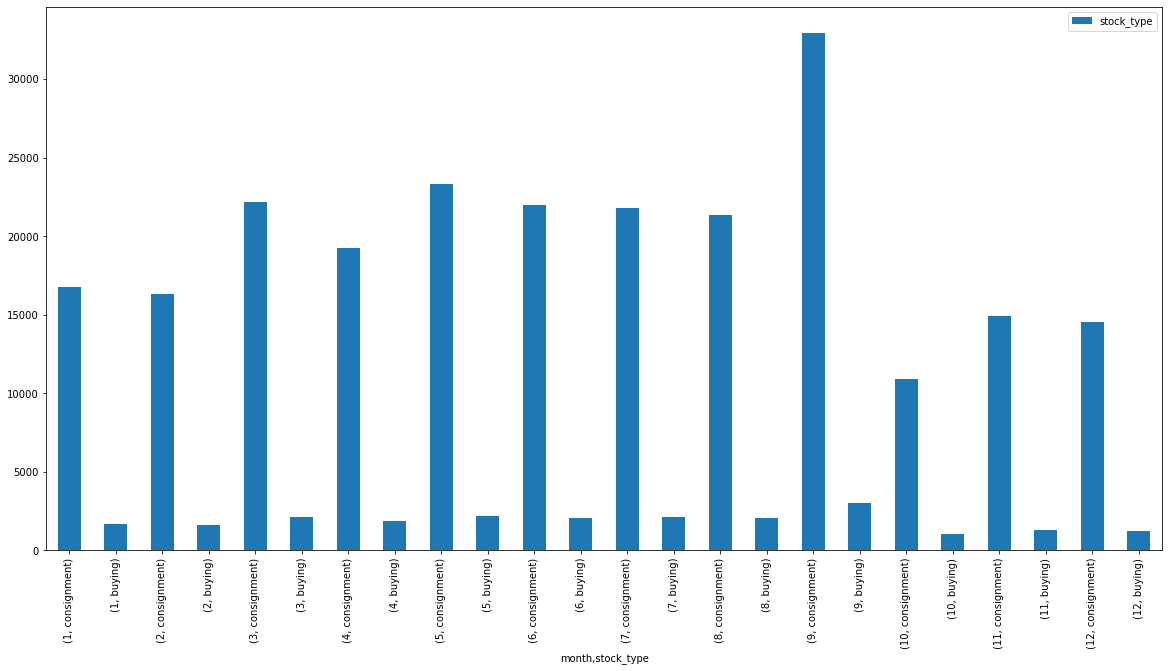

In [67]:
df4.plot.bar(figsize = (20,10))

In [70]:
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

#글꼴
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [1]:
sales2

NameError: name 'sales2' is not defined

In [4]:
sales

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5
...,...,...,...,...,...,...,...,...
258637,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4
258638,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6
258639,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0
258640,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8


In [6]:
sa = sales.query('sales<0')

In [18]:
sa

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
68,C540006,21306,SET/4 DAISY MIRROR MAGNETS,-1,2021-01-04,2.10,E14606,-2.10
69,C540006,84352,SILVER CHRISTMAS TREE BAUBLE STAND,-1,2021-01-04,16.95,E14606,-16.95
70,C540006,22423,REGENCY CAKESTAND 3 TIER,-1,2021-01-04,12.75,E14606,-12.75
71,C540007,21055,TOOL BOX SOFT TOY,-6,2021-01-04,8.95,E15379,-53.70
72,C540007,22274,FELTCRAFT DOLL EMILY,-6,2021-01-04,2.95,E15379,-17.70
...,...,...,...,...,...,...,...,...
258312,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2021-12-09,0.83,E14397,-9.13
258360,C581499,M,Manual,-1,2021-12-09,224.69,E15498,-224.69
258527,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2021-12-09,10.95,E15311,-54.75
258528,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2021-12-09,1.25,E17315,-1.25


In [11]:
sa['customer_id'].value_counts()

E17841    109
E17511     91
E15311     81
E13113     74
E14606     74
         ... 
E17080      1
E13539      1
E13451      1
E15589      1
E17173      1
Name: customer_id, Length: 1178, dtype: int64

In [27]:
sa[sa['quantity']<-500]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
9612,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2021-01-18,1.04,E12346,-77183.60
18026,C542693,15036,ASSORTED COLOURS SILK FAN,-600,2021-01-31,0.65,E12908,-390.00
38235,C545478,D,Discount,-720,2021-03-03,0.01,E16422,-7.20
74656,C550456,48185,DOORMAT FAIRY CAKE,-670,2021-04-18,6.75,E15749,-4522.50
74657,C550456,47566B,TEA TIME PARTY BUNTING,-1300,2021-04-18,2.55,E15749,-3315.00
74658,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,2021-04-18,2.55,E15749,-4921.50
74659,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2021-04-18,1.85,E15749,-3700.00
74660,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2021-04-18,2.10,E15749,-6539.40
89270,C552568,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,-960,2021-05-10,0.21,E12901,-201.60
92153,C552995,M,Manual,-1350,2021-05-12,0.16,E18133,-216.00


In [69]:
sales[(sales['quantity']==74215)]
sales = sales.drop(labels=9607)

In [70]:
sales[(sales['quantity']==600)]
sales = sales.drop(labels=18027)

In [71]:
sales[(sales['quantity']==670)]
sales = sales.drop(labels=74723)

In [72]:
sales[(sales['quantity']==1300)]
sales = sales.drop(labels=74722)

In [73]:
sales[(sales['quantity']==1930)]
sales = sales.drop(labels=74721)

In [74]:
sales[(sales['quantity']==2000)]
sales = sales.drop(labels=74724)

In [75]:
sales[(sales['quantity']==3114)]
sales = sales.drop(labels=74725)

In [76]:

sales[(sales['quantity']==1515)]
sales = sales.drop(labels=116603)

In [77]:
sales[(sales['quantity']==828)]
sales = sales.drop(labels=130391)

In [78]:
sales[(sales['quantity']==701)]
sales = sales.drop(labels=130389)

In [79]:
sales[(sales['quantity']==756)]
sales = sales.drop(labels=198562)

In [80]:
sales[(sales['quantity']==1200)]
sales = sales.drop(labels=214904)

In [81]:
sales[(sales['quantity']==80995)]
sales = sales.drop(labels=258284)

In [82]:
sales= sales[sales['sales']>0]

In [83]:
sales

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5
...,...,...,...,...,...,...,...,...
258637,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4
258638,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6
258639,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0
258640,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8


In [88]:
sales[sales['quantity']<50]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5
...,...,...,...,...,...,...,...,...
258637,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4
258638,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6
258639,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0
258640,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8


In [89]:
sales[(sales['quantity']>=50)&(sales['quantity']<100)]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
23,540001,22644,CERAMIC CHERRY CAKE MONEY BANK,60,2021-01-04,1.45,E18097,87.00
52,540004,84946,ANTIQUE SILVER TEA GLASS ETCHED,72,2021-01-04,1.06,E13094,76.32
80,540013,22151,PLACE SETTING WHITE HEART,72,2021-01-04,0.42,E16255,30.24
211,540017,85212,MINI PAINTED GARDEN DECORATION,72,2021-01-04,0.21,E13963,15.12
325,540022,16161P,WRAP ENGLISH ROSE,50,2021-01-04,0.42,E17188,21.00
...,...,...,...,...,...,...,...,...
258423,581514,17091J,VANILLA INCENSE IN TIN,66,2021-12-09,0.38,E17754,25.08
258430,581514,21705,BAG 500g SWIRLY MARBLES,84,2021-12-09,0.39,E17754,32.76
258515,581567,21417,COCKLE SHELL DISH,84,2021-12-09,0.79,E16626,66.36
258545,581571,23167,SMALL CERAMIC TOP STORAGE JAR,96,2021-12-09,0.69,E15311,66.24


In [91]:
sales[(sales['quantity']>=100)&(sales['quantity']<500)]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
29,540002,21790,VINTAGE SNAP CARDS,144,2021-01-04,0.72,E16656,103.68
384,540025,35957,SMALLFOLKART BAUBLE CHRISTMAS DEC,192,2021-01-04,0.19,E17428,36.48
524,540059,70006,LOVE HEART POCKET WARMER,120,2021-01-04,0.42,E17457,50.40
625,540096,22609,PENS ASSORTED SPACEBALL,144,2021-01-04,0.21,E13253,30.24
626,540096,22608,PENS ASSORTED FUNKY JEWELED,144,2021-01-04,0.21,E13253,30.24
...,...,...,...,...,...,...,...,...
257998,581457,23401,RUSTIC MIRROR WITH LACE HEART,126,2021-12-08,4.15,E18102,522.90
258305,581487,21137,BLACK RECORD COVER FRAME,120,2021-12-09,3.39,E15694,406.80
258364,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,2021-12-09,0.19,E12985,34.20
258514,581566,23404,HOME SWEET HOME BLACKBOARD,144,2021-12-09,3.26,E18102,469.44


In [92]:
sales[(sales['quantity']>500)]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
979,540160,22379,RECYCLING BAG RETROSPOT,600,2021-01-05,1.85,E15769,1110.0
1475,540245,17003,BROCADE RING PURSE,720,2021-01-05,0.16,E13082,115.2
1822,540264,22197,SMALL POPCORN HOLDER,600,2021-01-06,0.72,E17949,432.0
2562,540363,40016,CHINESE DRAGON PAPER LANTERNS,600,2021-01-06,0.25,E12971,150.0
3011,540405,40016,CHINESE DRAGON PAPER LANTERNS,600,2021-01-07,0.25,E14828,150.0
...,...,...,...,...,...,...,...,...
254585,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2021-12-07,2.75,E15195,3861.0
256564,581375,21137,BLACK RECORD COVER FRAME,960,2021-12-08,3.39,E16210,3254.4
257990,581457,23543,WALL ART KEEP CALM,698,2021-12-08,4.15,E18102,2896.7
257999,581458,22197,POPCORN HOLDER,1500,2021-12-08,0.72,E17949,1080.0


In [93]:
sales = pd.merge(sales, customer, on=['customer_id'],how ='left')

In [94]:
sales = pd.merge(sales, stock, on=['product_name'],how ='left')
sales

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252752,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying
252753,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying
252754,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment
252755,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment


In [244]:
sales['date']=pd.to_datetime(sales['date'])

In [97]:
sales['month']= sales['date'].dt.month

In [98]:
sales['quarter']= sales['date'].dt.quarter

In [259]:
sales.to_csv('mergesales.csv',index = False)

PermissionError: [Errno 13] Permission denied: 'mergesales.csv'

In [89]:
salesdata = pd.read_csv("mergesales.csv")

In [15]:
salesdata

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,week
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246164,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying,12,4,49
246165,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying,12,4,49
246166,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49
246167,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49


In [16]:
salesdata['date'] = pd.to_datetime(salesdata['date'])

In [17]:
salesdata['week']= salesdata['date'].dt.week

<ipython-input-17-adde8451f783>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  salesdata['week']= salesdata['date'].dt.week


In [8]:
salesdata

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,week
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246164,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying,12,4,49
246165,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying,12,4,49
246166,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49
246167,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49


In [200]:
import matplotlib.pyplot as plt
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [19]:
salesdata = salesdata[salesdata['sales']<4000]

In [11]:
salesdata['date'] = pd.to_datetime(salesdata['date'])

<ipython-input-11-889000aaf57a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesdata['date'] = pd.to_datetime(salesdata['date'])


In [12]:
salesdata['date'] = salesdata['date'].apply(lambda x: x.strftime('%Y%m%d'))
salesdata['date'] = salesdata['date'].astype(int)

<ipython-input-12-eac7d867b841>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesdata['date'] = salesdata['date'].apply(lambda x: x.strftime('%Y%m%d'))
<ipython-input-12-eac7d867b841>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesdata['date'] = salesdata['date'].astype(int)


In [205]:
salesdata1= salesdata.groupby(['date'])['sales'].sum()

In [21]:
salesdata1= salesdata.groupby(['week','stock_type'])['sales'].sum()

In [207]:
salesdata1 = pd.DataFrame(salesdata1)

In [208]:
salesdata1

,sales
date,
2021-01-04,10286.03
2021-01-05,15886.51
2021-01-06,20816.20
2021-01-07,11634.92
2021-01-09,12312.10
...,...
2021-12-05,42288.70
2021-12-06,26674.58
2021-12-07,26084.64


In [209]:
salesdata1.to_csv('salesdata.csv')

In [212]:
salesdata1.reset_index(inplace = True)


In [213]:
salesdata1

,date,sales
0,2021-01-04,10286.03
1,2021-01-05,15886.51
2,2021-01-06,20816.20
3,2021-01-07,11634.92
4,2021-01-09,12312.10
...,...,...
243,2021-12-05,42288.70
244,2021-12-06,26674.58
245,2021-12-07,26084.64
246,2021-12-08,28924.10


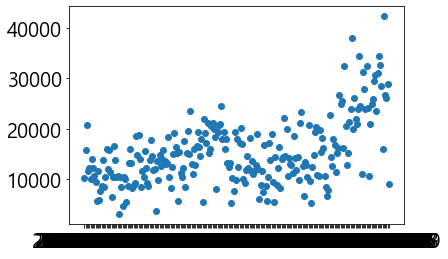

In [217]:
plt.scatter(salesdata1['date'],salesdata1['sales'])

In [225]:
sd1 = salesdata1[salesdata1['stock_type']=='buying']

In [226]:
sd2 = salesdata1[salesdata1['stock_type']=='consignment']

<AxesSubplot:xlabel='week', ylabel='sales'>

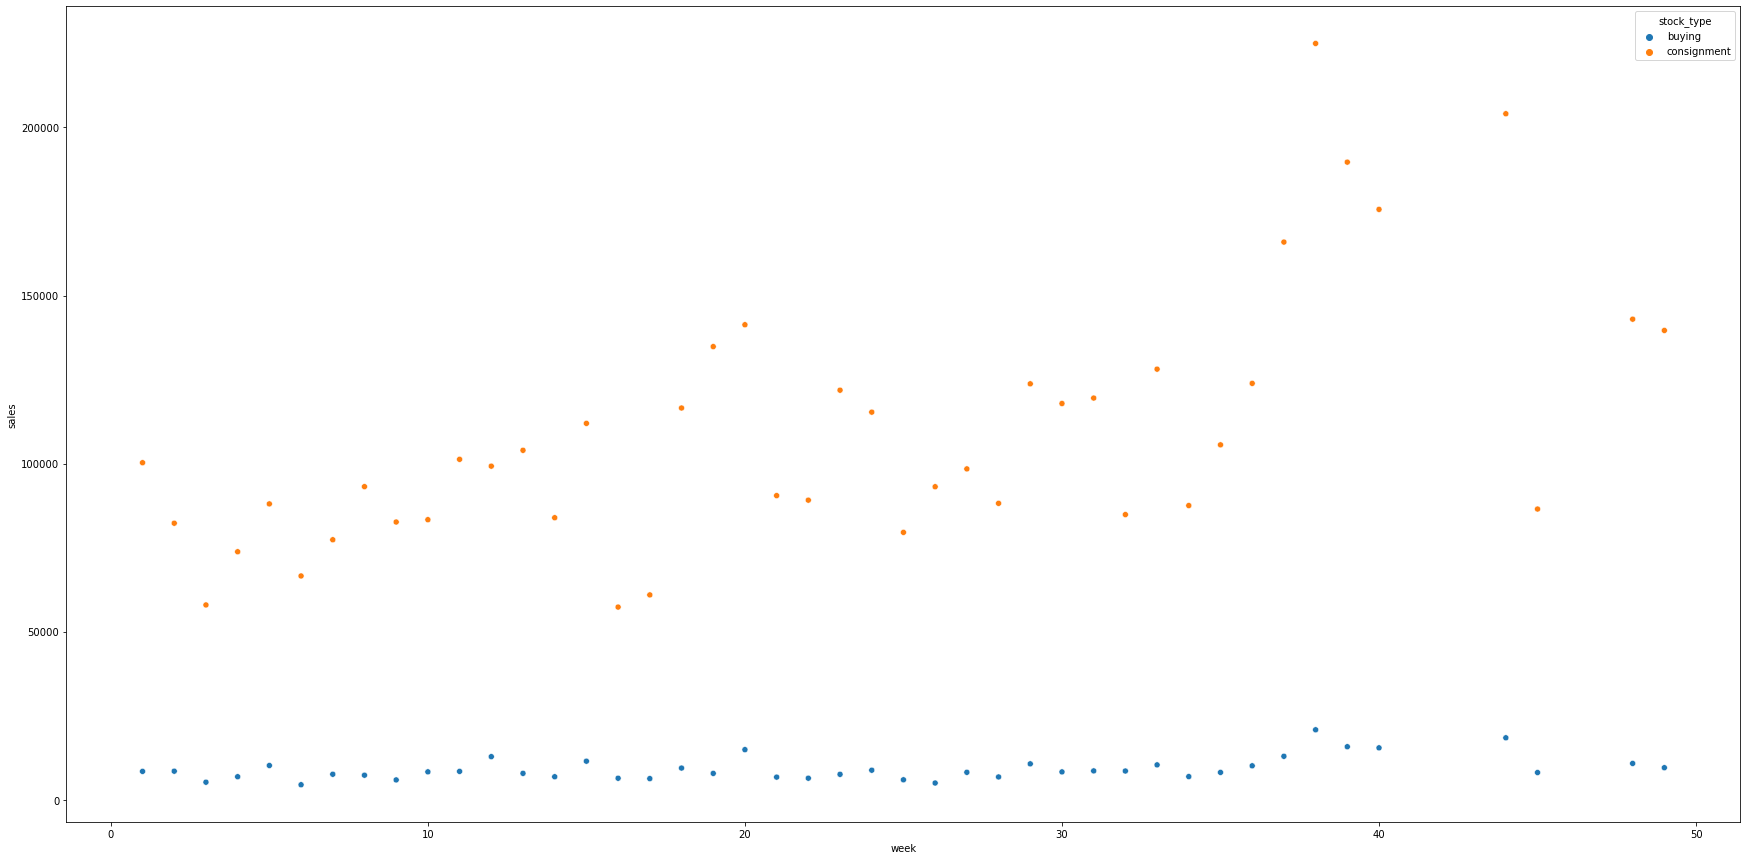

In [271]:
plt.figure(figsize = (30,15))
sns.scatterplot(data=salesdata1, x="week", y="sales",hue='stock_type')

C:\Users\pyund\anaconda3\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


([<matplotlib.axis.XTick at 0x1be29e523d0>,
 [Text(0.0, 0, '2021-1'),
  Text(10.0, 0, '2021-4'),
  Text(20.0, 0, '2021-8'),
  Text(30.0, 0, '2021-12')])

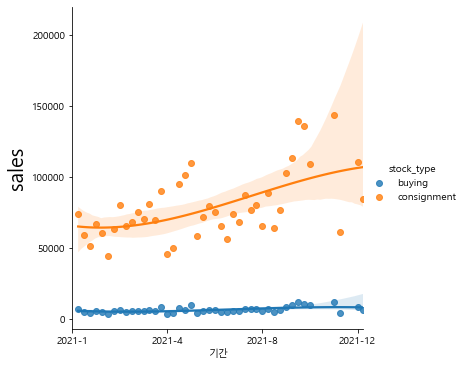

In [86]:

abc = sns.lmplot(data=salesdata1, x="week", y="sales",hue='stock_type',order =3)
plt.xlabel('기간',fontsize=10)
plt.ylabel('sales',fontsize=20)
abc.set(xticklabels=['2021-1','2021-4','2021-8','2021-12'])
# 축 눈금, 이름 따로 설정하기
plt.xticks(range(0, 52, 16))


In [216]:
plt.figure(figsize=(30,15))
abcd=sns.regrplot(data=salesdata1, x="date", y="sales",order =3)
# plt.xlabel('기간',fontsize=10)
# plt.ylabel('sales',fontsize=20)
# abcd.set(xticklabels=['2021-1','2021-4','2021-8','2021-12'])
# # 축 눈금, 이름 따로 설정하기
# plt.xticks(range(0, 52, 16))

AttributeError: module 'seaborn' has no attribute 'regrplot'

<Figure size 2160x1080 with 0 Axes>

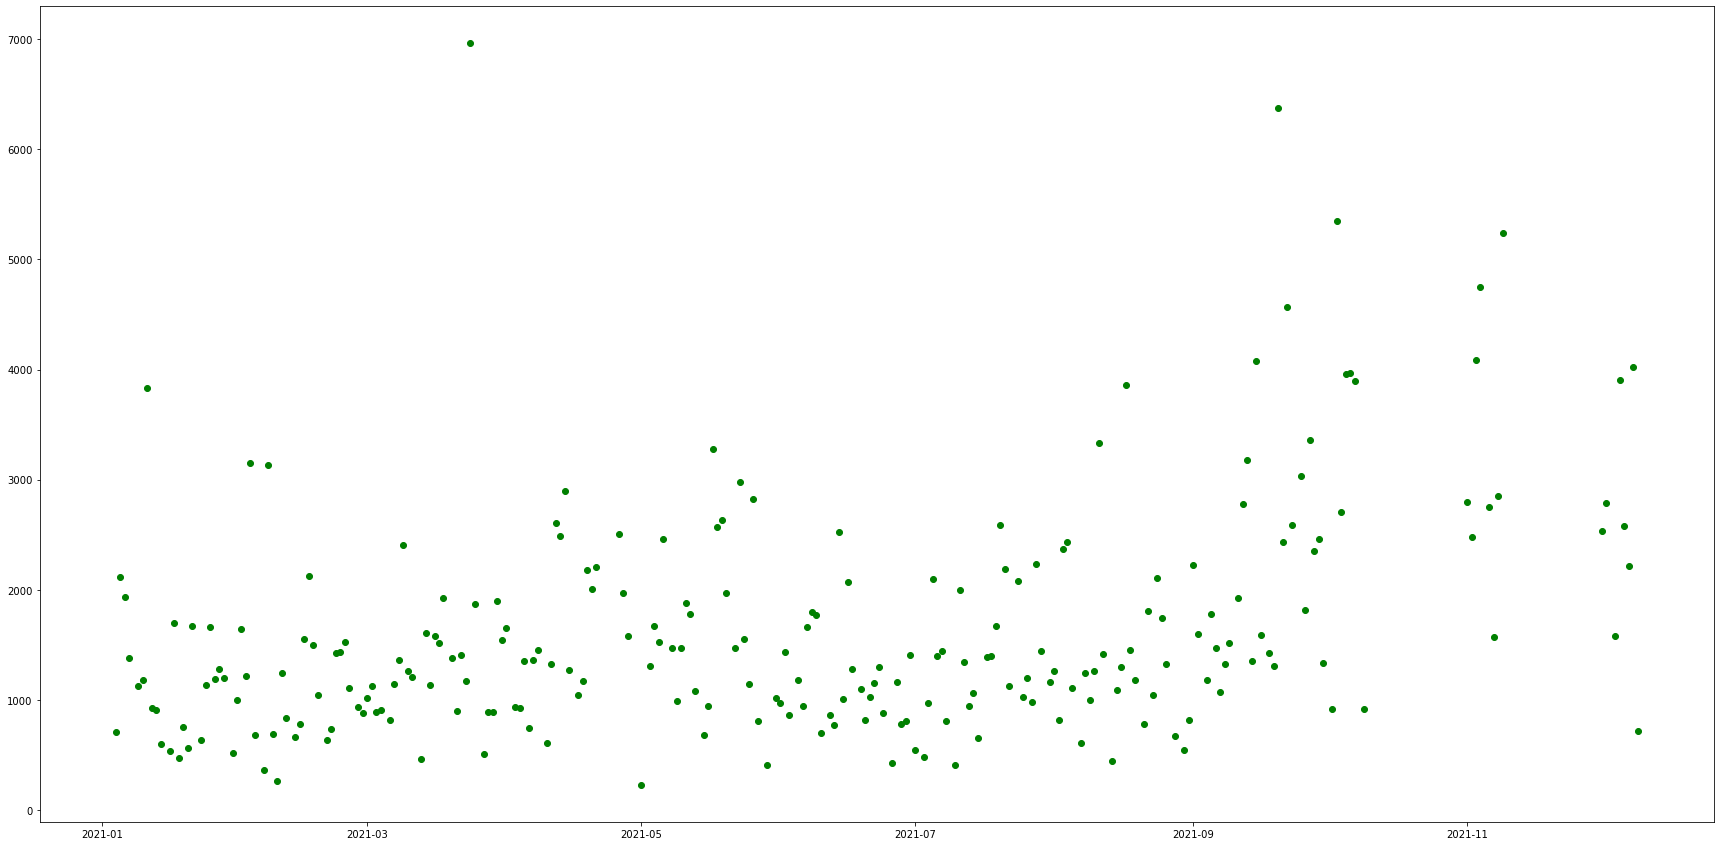

In [209]:
plt.figure(figsize= (30,15))
plt.scatter(sd2['date'],sd1['sales'],c="green")

In [233]:
salesdata

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,week
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252752,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying,12,4,49
252753,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying,12,4,49
252754,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49
252755,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49


In [238]:
salesdata2= salesdata.groupby(['week','stock_type','city'])['sales'].sum()
salesdata2 = pd.DataFrame(salesdata2)
salesdata2.reset_index(inplace = True)

In [274]:
salesdata2

,week,stock_type,city,sales
0,1,buying,Chicago,1119.94
1,1,buying,Dallas,240.96
2,1,buying,Honolulu,51.60
3,1,buying,Houston,1184.23
4,1,buying,Las Vegas,136.11
...,...,...,...,...
1127,49,consignment,Philadelphia,5210.54
1128,49,consignment,Phoenix,7469.38
1129,49,consignment,San Antonio,3648.44
1130,49,consignment,San Diego,3566.95


In [281]:
chisd =salesdata2[salesdata2['city']=='Chicago']

<Figure size 2160x1080 with 0 Axes>

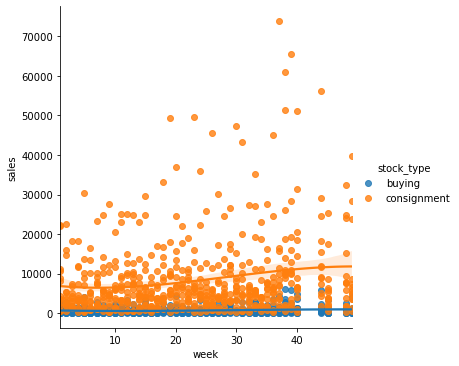

In [283]:
plt.figure(figsize=(30,15))
sns.lmplot(data=chisd, x="week", y="sales",hue='stock_type',order =3)

In [286]:
salesdata

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,week
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252752,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying,12,4,49
252753,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying,12,4,49
252754,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49
252755,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49


In [288]:
salesdata['date']

0        2021-01-04
1        2021-01-04
2        2021-01-04
3        2021-01-04
4        2021-01-04
            ...    
252752   2021-12-09
252753   2021-12-09
252754   2021-12-09
252755   2021-12-09
252756   2021-12-09
Name: date, Length: 252748, dtype: datetime64[ns]

In [291]:
salesdata1= salesdata.groupby(['date'])['quantity'].sum()
salesdata1 = pd.DataFrame(salesdata1)
salesdata1.reset_index(inplace = True)

In [314]:
salesdata1.set_index('date', inplace= True)
salesdata1

,quantity
date,
2021-01-04,6657
2021-01-05,17634
2021-01-06,16289
2021-01-07,11238
2021-01-09,7321
...,...
2021-12-05,36596
2021-12-06,25823
2021-12-07,28988


In [322]:
saledata1=salesdata1.rolling(window=8).mean()

In [323]:
saledata1

,quantity
date,
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,NaN
2021-01-07,NaN
2021-01-09,NaN
...,...
2021-12-05,22698.50
2021-12-06,23660.25
2021-12-07,25426.75


<AxesSubplot:xlabel='date'>

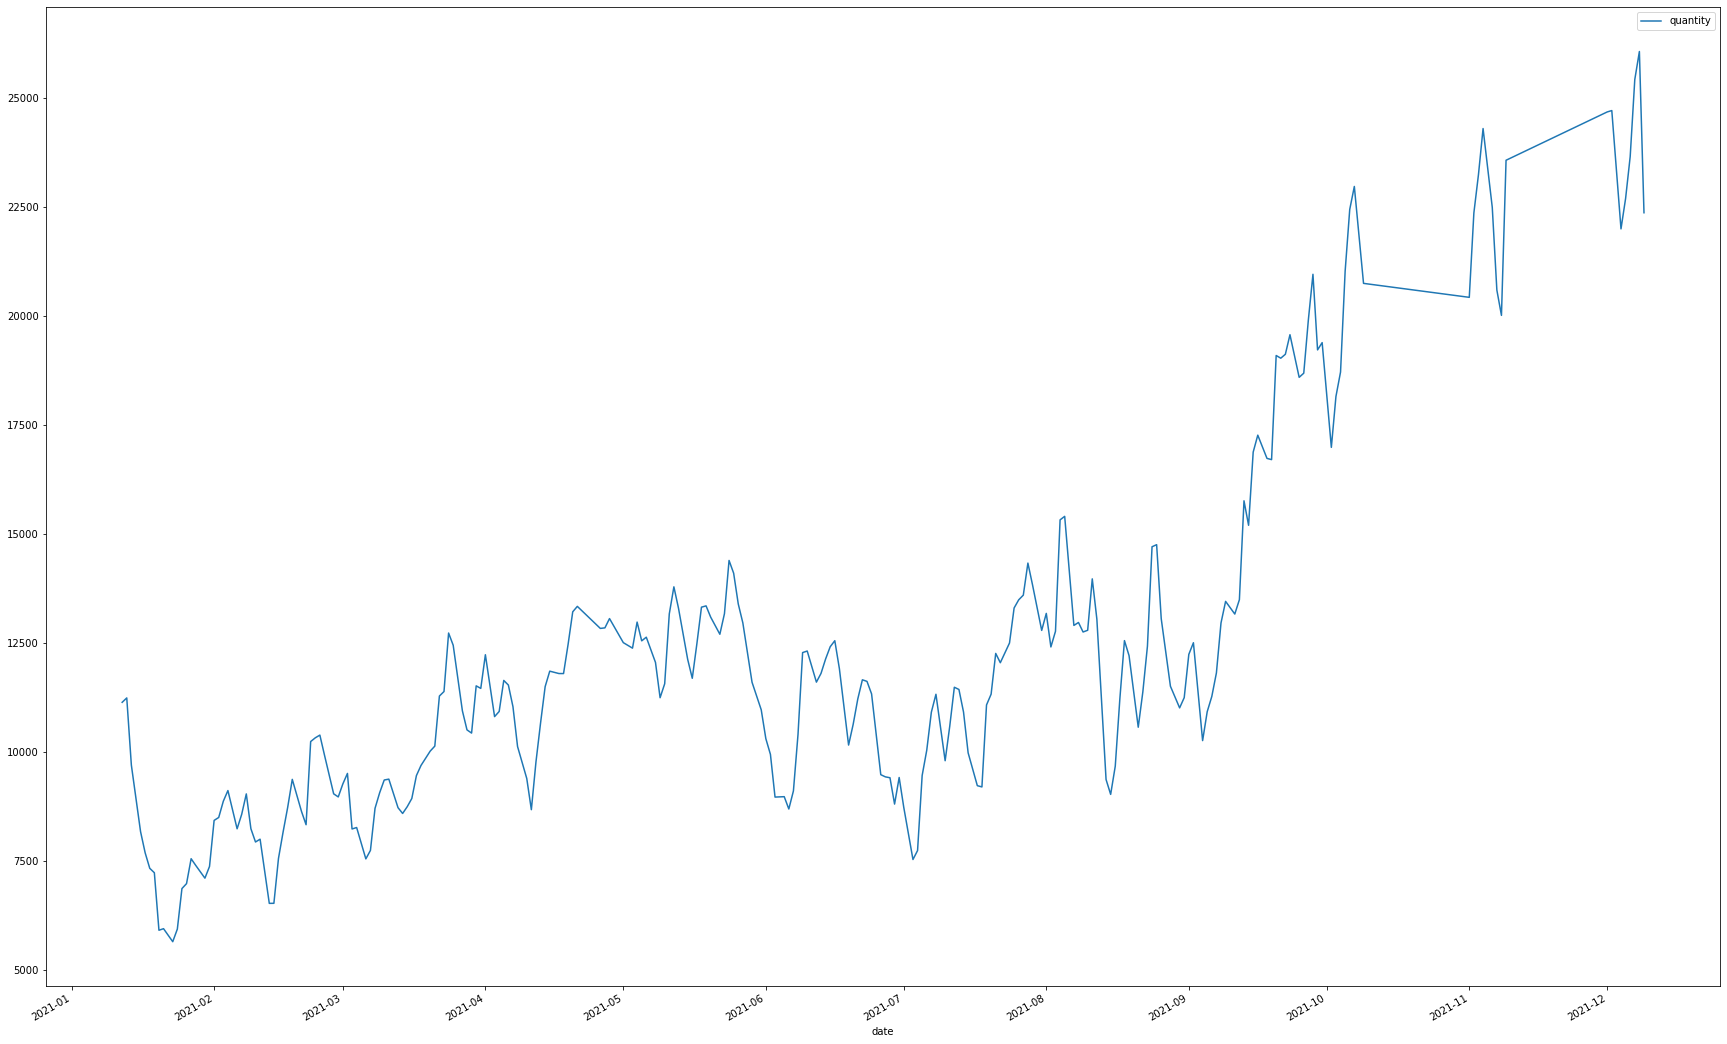

In [324]:
saledata1.plot(y='quantity', figsize=(30,20))

In [334]:
salesdata2= salesdata.groupby(['date'])['sales'].sum()
salesdata2 = pd.DataFrame(salesdata2)
salesdata2.reset_index(inplace = True)

In [335]:
salesdata2.set_index('date', inplace= True)
salesdata2

,sales
date,
2021-01-04,11557.55
2021-01-05,27408.25
2021-01-06,26390.39
2021-01-07,17617.90
2021-01-09,14118.52
...,...
2021-12-05,54792.12
2021-12-06,41915.02
2021-12-07,49129.86


In [337]:
salessum= salesdata.groupby(['week'])['sales'].sum()
salessum = pd.DataFrame(salessum)
salessum.reset_index(inplace = True)

AttributeError: 'FacetGrid' object has no attribute 'set_xticks'

<Figure size 1440x1080 with 0 Axes>

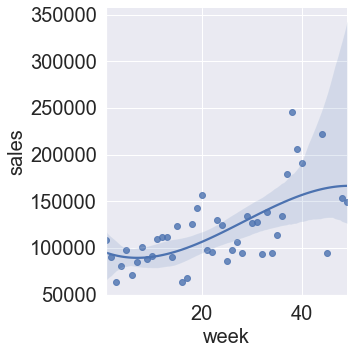

In [568]:
plt.figure(figsize=(20,15))
g= sns.lmplot(data=salessum, x="week", y="sales",order =3)
g.set_xticks(range(6))
g.set_xticklabels(['0','1','2','3','4','5'])
plt.show()


In [327]:
saledata2=salesdata2.rolling(window=8).mean()

<AxesSubplot:xlabel='date'>

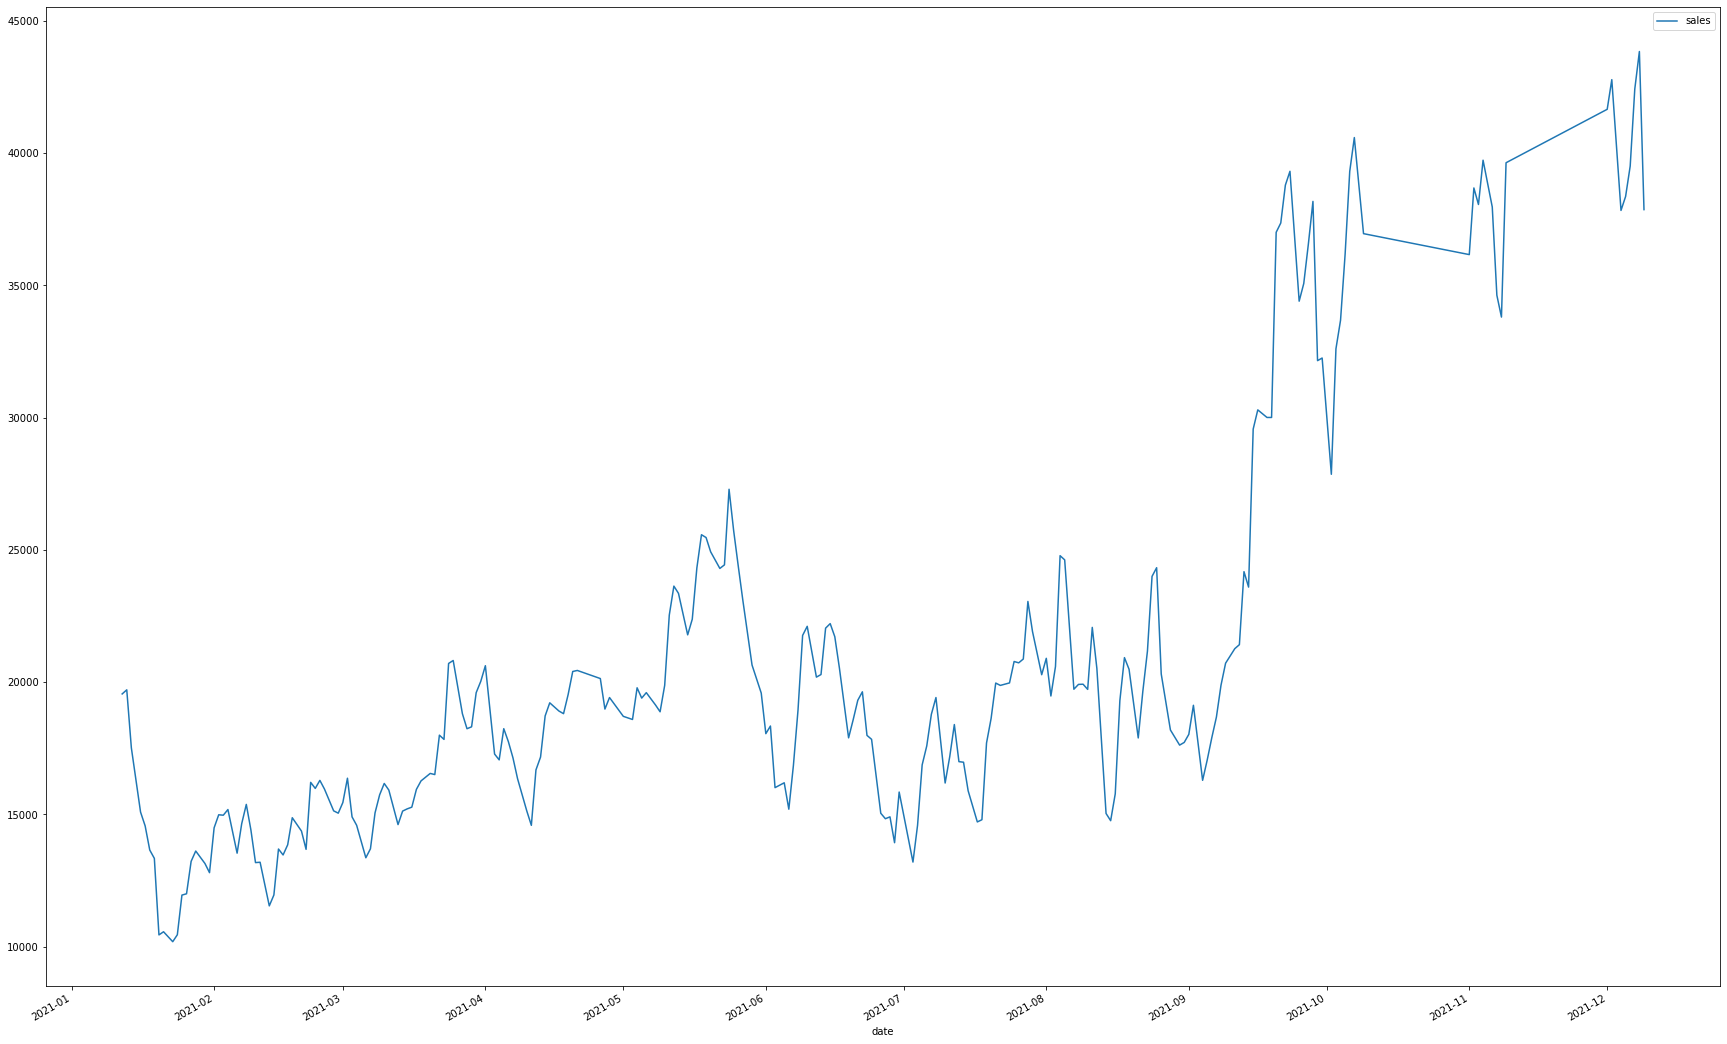

In [328]:
saledata2.plot(y='sales', figsize=(30,20))

In [329]:
#날짜별 물품 판매 빈도수
salesdata3= salesdata.groupby(['month'])['product_name'].value_counts()
salesdata3

month  product_name                      
1      WHITE HANGING HEART T-LIGHT HOLDER    151
       HEART OF WICKER SMALL                 116
       SET OF 3 CAKE TINS PANTRY DESIGN      112
       NATURAL SLATE HEART CHALKBOARD         93
       REGENCY CAKESTAND 3 TIER               88
                                            ... 
12     WRAP SUKI AND FRIENDS                   1
       YELLOW POT PLANT CANDLE                 1
       YELLOW/BLUE RETRO RADIO                 1
       ZINC  STAR T-LIGHT HOLDER               1
       ZINC WIRE SWEETHEART LETTER TRAY        1
Name: product_name, Length: 26466, dtype: int64

In [331]:
salesdata3 = pd.DataFrame(salesdata3)
salesdata3

product_name
month product_name                                    
1     WHITE HANGING HEART T-LIGHT HOLDER           151
      HEART OF WICKER SMALL                        116
      SET OF 3 CAKE TINS PANTRY DESIGN             112
      NATURAL SLATE HEART CHALKBOARD                93
      REGENCY CAKESTAND 3 TIER                      88
...                                                ...
12    WRAP SUKI AND FRIENDS                          1
      YELLOW POT PLANT CANDLE                        1
      YELLOW/BLUE RETRO RADIO                        1
      ZINC  STAR T-LIGHT HOLDER                      1
      ZINC WIRE SWEETHEART LETTER TRAY               1

[26466 rows x 1 columns]

In [410]:
salesdata = pd.read_csv("mergesales.csv")

In [411]:
salesdata

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252752,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying,12,4
252753,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying,12,4
252754,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4
252755,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4


In [412]:
salesdata['product_name'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    1465
PARTY BUNTING                         1184
JUMBO BAG RED RETROSPOT               1144
REGENCY CAKESTAND 3 TIER              1120
ASSORTED COLOUR BIRD ORNAMENT          996
                                      ... 
HAND PAINTED HANGING EASTER EGG          1
PLAYING CARDS VINTAGE DOILEY             1
DIAMANTE HAIR GRIP PACK/2 RUBY           1
SILVER BLACK ORBIT DROP EARRINGS         1
IVORY SHELL HEART EARRINGS               1
Name: product_name, Length: 3701, dtype: int64

In [418]:
sddata= salesdata[salesdata['city']=='San Diego']
sddata

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter
102,540014,21654,RIDGED GLASS FINGER BOWL,1,2021-01-04,1.45,E14606,1.45,San Diego,CA,1429,844,middle,sightseeing,west,consignment,1,1
103,540014,84499,BLACK FLOWER CANDLE PLATE,6,2021-01-04,0.85,E14606,5.10,San Diego,CA,1429,844,middle,sightseeing,west,consignment,1,1
104,540014,21661,VINTAGE GLASS TEA CADDY,1,2021-01-04,5.95,E14606,5.95,San Diego,CA,1429,844,middle,sightseeing,west,consignment,1,1
105,540014,21703,BAG 125g SWIRLY MARBLES,3,2021-01-04,0.42,E14606,1.26,San Diego,CA,1429,844,middle,sightseeing,west,consignment,1,1
106,540014,22274,FELTCRAFT DOLL EMILY,1,2021-01-04,2.95,E14606,2.95,San Diego,CA,1429,844,middle,sightseeing,west,buying,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252224,581469,21485,RETROSPOT HEART HOT WATER BOTTLE,1,2021-12-08,4.95,E14606,4.95,San Diego,CA,1429,844,middle,sightseeing,west,consignment,12,4
252225,581469,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",1,2021-12-08,3.95,E14606,3.95,San Diego,CA,1429,844,middle,sightseeing,west,consignment,12,4
252226,581469,21986,PACK OF 12 PINK POLKADOT TISSUES,1,2021-12-08,0.39,E14606,0.39,San Diego,CA,1429,844,middle,sightseeing,west,consignment,12,4
252227,581469,22087,PAPER BUNTING WHITE LACE,6,2021-12-08,2.95,E14606,17.70,San Diego,CA,1429,844,middle,sightseeing,west,consignment,12,4


In [497]:
sddata['customer_id'].value_counts()

E14606    2081
E15039    1269
E13081     886
E18283     474
E16923     387
          ... 
E16073       1
E18133       1
E18233       1
E15802       1
E13703       1
Name: customer_id, Length: 185, dtype: int64

In [495]:
sddata.count()

invoice          14699
product_code     14699
product_name     14699
quantity         14699
date             14699
unit_price       14699
customer_id      14699
sales            14699
city             14699
state            14699
pop_thousand     14699
land_sq_meter    14699
pop_size         14699
city_type        14699
city_lctn        14699
stock_type       14699
month            14699
quarter          14699
dtype: int64

In [515]:
sdpie = sddata['product_name'].value_counts().head(5)

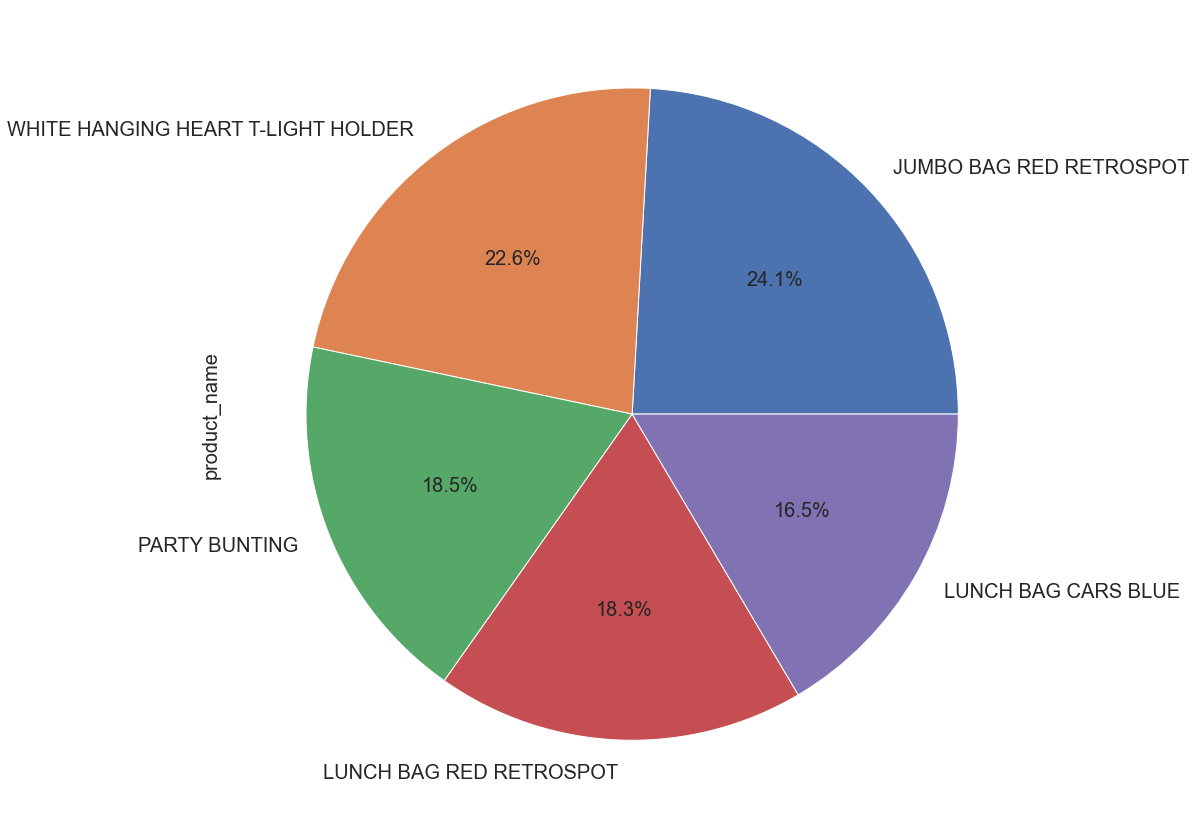

In [526]:
plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

sdpie.plot.pie(y='oxy',autopct = '%.1f%%')
plt.rc('font',size=30)  # 범례 폰트 크기

In [417]:
salesdata[salesdata['product_name']=='JUMBO BAG RED RETROSPOT']

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter
5,539993,85099B,JUMBO BAG RED RETROSPOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
269,540021,85099B,JUMBO BAG RED RETROSPOT,4,2021-01-04,1.95,E17841,7.80,New York,NY,8177,778,big,metro,east,consignment,1,1
723,540099,85099B,JUMBO BAG RED RETROSPOT,13,2021-01-04,1.95,E15808,25.35,San Antonio,TX,1598,1291,middle,other,south,consignment,1,1
881,540149,85099B,JUMBO BAG RED RETROSPOT,30,2021-01-05,1.95,E12921,58.50,Las Vegas,NV,675,367,small,sightseeing,west,consignment,1,1
913,540157,85099B,JUMBO BAG RED RETROSPOT,100,2021-01-05,1.65,E15311,165.00,Houston,TX,2325,1658,middle,other,south,consignment,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251008,581401,85099B,JUMBO BAG RED RETROSPOT,10,2021-12-08,2.08,E17644,20.80,Los Angeles,CA,3985,1216,middle,metro,west,consignment,12,4
251075,581403,85099B,JUMBO BAG RED RETROSPOT,10,2021-12-08,2.08,E13510,20.80,Los Angeles,CA,3985,1216,middle,metro,west,consignment,12,4
251406,581412,85099B,JUMBO BAG RED RETROSPOT,3,2021-12-08,2.08,E14415,6.24,Houston,TX,2325,1658,middle,other,south,consignment,12,4
251707,581421,85099B,JUMBO BAG RED RETROSPOT,9,2021-12-08,2.08,E15898,18.72,Philadelphia,PA,1585,348,middle,other,east,consignment,12,4


In [419]:
nydata= salesdata[salesdata['city']=='New York']

In [420]:
nydata['product_name'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    430
REGENCY CAKESTAND 3 TIER              335
ASSORTED COLOUR BIRD ORNAMENT         324
PARTY BUNTING                         324
JUMBO BAG RED RETROSPOT               293
                                     ... 
MOROCCAN BEATEN METAL DISH              1
RESIN NECKLACE W PASTEL BEADS           1
ASS COL LARGE SAND FROG P'WEIGHT        1
VINTAGE NOTEBOOK TRAVELOGUE             1
DOUBLE CERAMIC PARLOUR HOOK             1
Name: product_name, Length: 3367, dtype: int64

In [422]:
cityc=salesdata[['city','product_name']]

In [425]:
cityc[cityc['product_name']=='WHITE HANGING HEART T-LIGHT HOLDER'].value_counts()

city          product_name                      
New York      WHITE HANGING HEART T-LIGHT HOLDER    430
Los Angeles   WHITE HANGING HEART T-LIGHT HOLDER    219
Chicago       WHITE HANGING HEART T-LIGHT HOLDER    183
Phoenix       WHITE HANGING HEART T-LIGHT HOLDER    119
Houston       WHITE HANGING HEART T-LIGHT HOLDER    110
San Diego     WHITE HANGING HEART T-LIGHT HOLDER     89
Philadelphia  WHITE HANGING HEART T-LIGHT HOLDER     69
San Antonio   WHITE HANGING HEART T-LIGHT HOLDER     68
San Jose      WHITE HANGING HEART T-LIGHT HOLDER     53
Dallas        WHITE HANGING HEART T-LIGHT HOLDER     44
Las Vegas     WHITE HANGING HEART T-LIGHT HOLDER     36
Miami         WHITE HANGING HEART T-LIGHT HOLDER     28
Honolulu      WHITE HANGING HEART T-LIGHT HOLDER     17
dtype: int64

In [426]:
cityc[cityc['product_name']=='PARTY BUNTING'].value_counts()

city          product_name 
New York      PARTY BUNTING    324
Los Angeles   PARTY BUNTING    182
Chicago       PARTY BUNTING    116
Houston       PARTY BUNTING     92
Phoenix       PARTY BUNTING     88
San Diego     PARTY BUNTING     73
San Antonio   PARTY BUNTING     67
Dallas        PARTY BUNTING     65
San Jose      PARTY BUNTING     57
Philadelphia  PARTY BUNTING     43
Las Vegas     PARTY BUNTING     36
Miami         PARTY BUNTING     29
Honolulu      PARTY BUNTING     12
dtype: int64

In [427]:
cityc[cityc['product_name']=='JUMBO BAG RED RETROSPOT'].value_counts()

city          product_name           
New York      JUMBO BAG RED RETROSPOT    293
Los Angeles   JUMBO BAG RED RETROSPOT    168
Chicago       JUMBO BAG RED RETROSPOT    109
San Diego     JUMBO BAG RED RETROSPOT     95
Phoenix       JUMBO BAG RED RETROSPOT     94
Houston       JUMBO BAG RED RETROSPOT     84
Dallas        JUMBO BAG RED RETROSPOT     68
San Jose      JUMBO BAG RED RETROSPOT     61
Philadelphia  JUMBO BAG RED RETROSPOT     57
San Antonio   JUMBO BAG RED RETROSPOT     48
Las Vegas     JUMBO BAG RED RETROSPOT     45
Miami         JUMBO BAG RED RETROSPOT     12
Honolulu      JUMBO BAG RED RETROSPOT     10
dtype: int64

In [90]:
citypro =salesdata.groupby(['month','city','product_name'])['sales'].sum()

In [91]:
citypro = pd.DataFrame(citypro)

In [92]:
citypro.reset_index(inplace = True)

In [93]:
citypro

,month,city,product_name,sales
0,1,Chicago,12 COLOURED PARTY BALLOONS,6.50
1,1,Chicago,12 DAISY PEGS IN WOOD BOX,19.80
2,1,Chicago,12 IVORY ROSE PEG PLACE SETTINGS,2.50
3,1,Chicago,12 MESSAGE CARDS WITH ENVELOPES,23.10
4,1,Chicago,12 PENCIL SMALL TUBE WOODLAND,3.25
...,...,...,...,...
112256,12,San Jose,WRAP VINTAGE DOILY,21.00
112257,12,San Jose,WRAP ALPHABET DESIGN,21.00
112258,12,San Jose,WRAP KEEP CALM BIRTHDAY,10.50
112259,12,San Jose,WRAP PAISLEY PARK,21.00


In [94]:
citypro1=citypro[citypro['product_name']=='WHITE HANGING HEART T-LIGHT HOLDER']

In [95]:
cp1 = citypro1[citypro1['city']=='Chicago']

In [96]:
cp2 = citypro1[citypro1['city']=='Los Angeles']

In [97]:
cp3 = citypro1[citypro1['city']=='New York']

In [98]:
cp4 = citypro1[citypro1['city']=='San Diego']
cp4.loc[12]=[12, 'San Diego','mm', 0]

C:\Users\pyund\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [99]:
cp5 = citypro1[citypro1['city']=='Phoenix']

In [100]:
cp6 = citypro1[citypro1['city']=='Houston']

In [101]:
cp7 = citypro1[citypro1['city']=='Dallas']
cp7.loc[10]=[10, 'Dallas','mm', 0]
cp7.loc[11]=[11, 'Dallas','mm', 0]
cp7.loc[12]=[12, 'Dallas','mm', 0]

In [102]:
cp8 = citypro1[citypro1['city']=='San Jose']
cp8.loc[10]=[10, 'San Jose','mm', 0]

In [103]:
cp9 = citypro1[citypro1['city']=='Philadelphia']

In [104]:
cp10 = citypro1[citypro1['city']=='San Antonio']

In [105]:
cp11 = citypro1[citypro1['city']=='Las Vegas']

In [106]:
cp12 = citypro1[citypro1['city']=='Miami']
cp12.loc[6]=[6, 'San Jose','mm', 0]

In [107]:
cp13 = citypro1[citypro1['city']=='Honolulu']
cp13.loc[2]=[2, 'San Jose','mm', 0]
cp13.loc[9]=[9, 'San Jose','mm', 0]
cp13.loc[10]=[10, 'San Jose','mm', 0]
cp13.loc[12]=[12, 'San Jose','mm', 0]


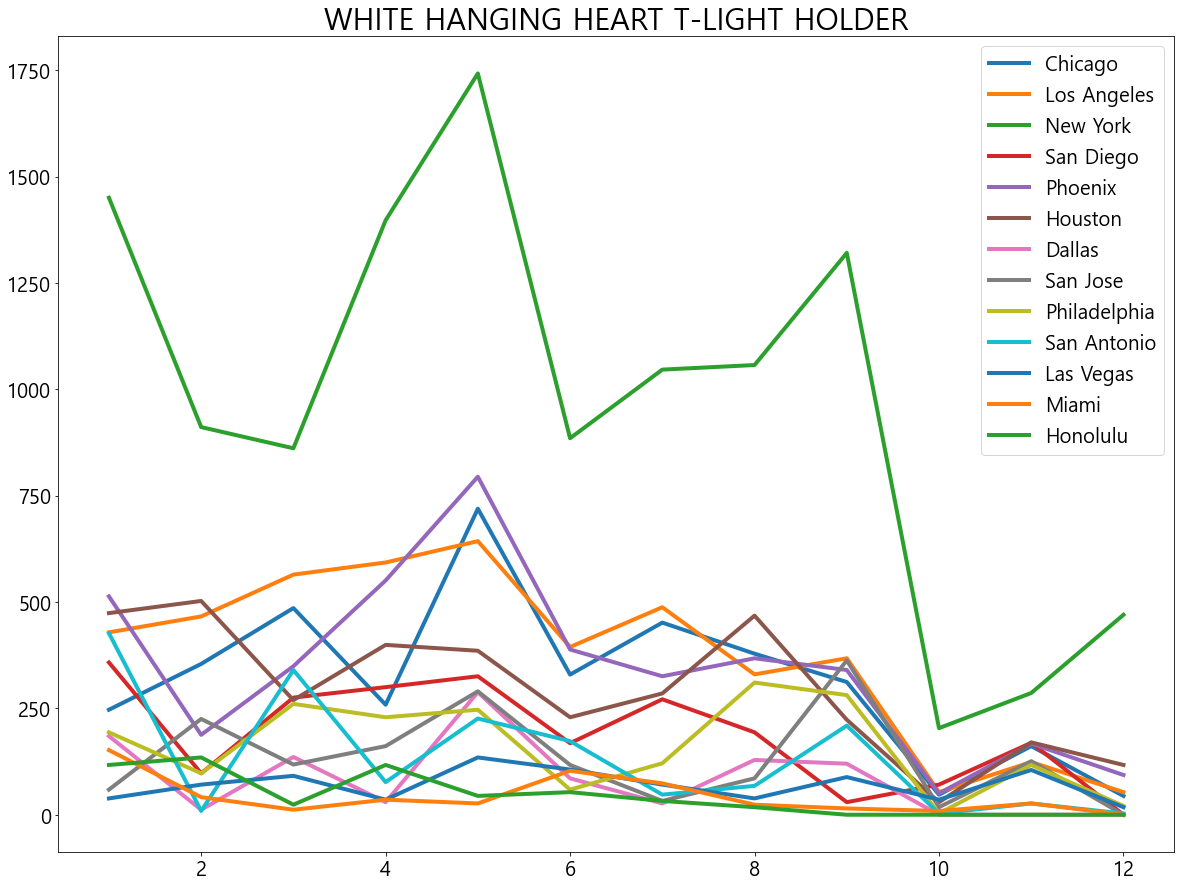

In [116]:
plt.figure(figsize= (20,15))
plt.plot(cp1['month'],cp1['sales'],label = 'Chicago', linewidth='4' )
plt.plot(cp1['month'],cp2['sales'],label = 'Los Angeles', linewidth='4' )
plt.plot(cp1['month'],cp3['sales'],label = 'New York', linewidth='4' )
plt.plot(cp1['month'],cp4['sales'],label = 'San Diego', linewidth='4' )
plt.plot(cp1['month'],cp5['sales'],label = 'Phoenix', linewidth='4' )
plt.plot(cp1['month'],cp6['sales'],label = 'Houston', linewidth='4' )
plt.plot(cp1['month'],cp7['sales'],label = 'Dallas', linewidth='4' )
plt.plot(cp1['month'],cp8['sales'],label = 'San Jose', linewidth='4' )
plt.plot(cp1['month'],cp9['sales'],label = 'Philadelphia', linewidth='4' )
plt.plot(cp1['month'],cp10['sales'],label = 'San Antonio', linewidth='4' )
plt.plot(cp1['month'],cp11['sales'],label = 'Las Vegas', linewidth='4' )
plt.plot(cp1['month'],cp12['sales'],label = 'Miami', linewidth='4' )
plt.plot(cp1['month'],cp13['sales'],label = 'Honolulu', linewidth='4' )
plt.title('WHITE HANGING HEART T-LIGHT HOLDER',fontsize=30)
plt.legend(fontsize = 20,loc = 'upper right')
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

In [117]:
citypro2=citypro[citypro['product_name']=='JUMBO BAG RED RETROSPOT']

In [139]:
cp1 = citypro2[citypro2['city']=='Chicago']


In [140]:
cp2 = citypro2[citypro2['city']=='Los Angeles']

In [141]:
cp3 = citypro2[citypro2['city']=='New York']

In [142]:
cp4 = citypro2[citypro2['city']=='San Diego']

In [143]:
cp5 = citypro2[citypro2['city']=='Phoenix']

In [144]:
cp6 = citypro2[citypro2['city']=='Houston']

In [158]:
cp7 = citypro2[citypro2['city']=='Dallas']
cp7.loc[2]=[2, 'Dallas','mm', 0]

In [159]:
cp8 = citypro2[citypro2['city']=='San Jose']
cp8.loc[1]=[1, 'Dallas','mm', 0]

In [147]:
cp9 = citypro2[citypro2['city']=='Philadelphia']

In [148]:
cp10 = citypro2[citypro2['city']=='San Antonio']

In [167]:
cp11 = citypro2[citypro2['city']=='Las Vegas']
cp11.loc[5]=[5, 'Dallas','mm', 0]

C:\Users\pyund\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [170]:
cp12 = citypro2[citypro2['city']=='Miami']
cp12.loc[1]=[1, 'Dallas','mm', 0]
cp12.loc[3]=[3, 'Dallas','mm', 0]
cp12.loc[5]=[5, 'Dallas','mm', 0]
cp12.loc[6]=[6, 'Dallas','mm', 0]
cp12.loc[11]=[11, 'Dallas','mm', 0]
cp12.loc[12]=[12, 'Dallas','mm', 0]

C:\Users\pyund\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


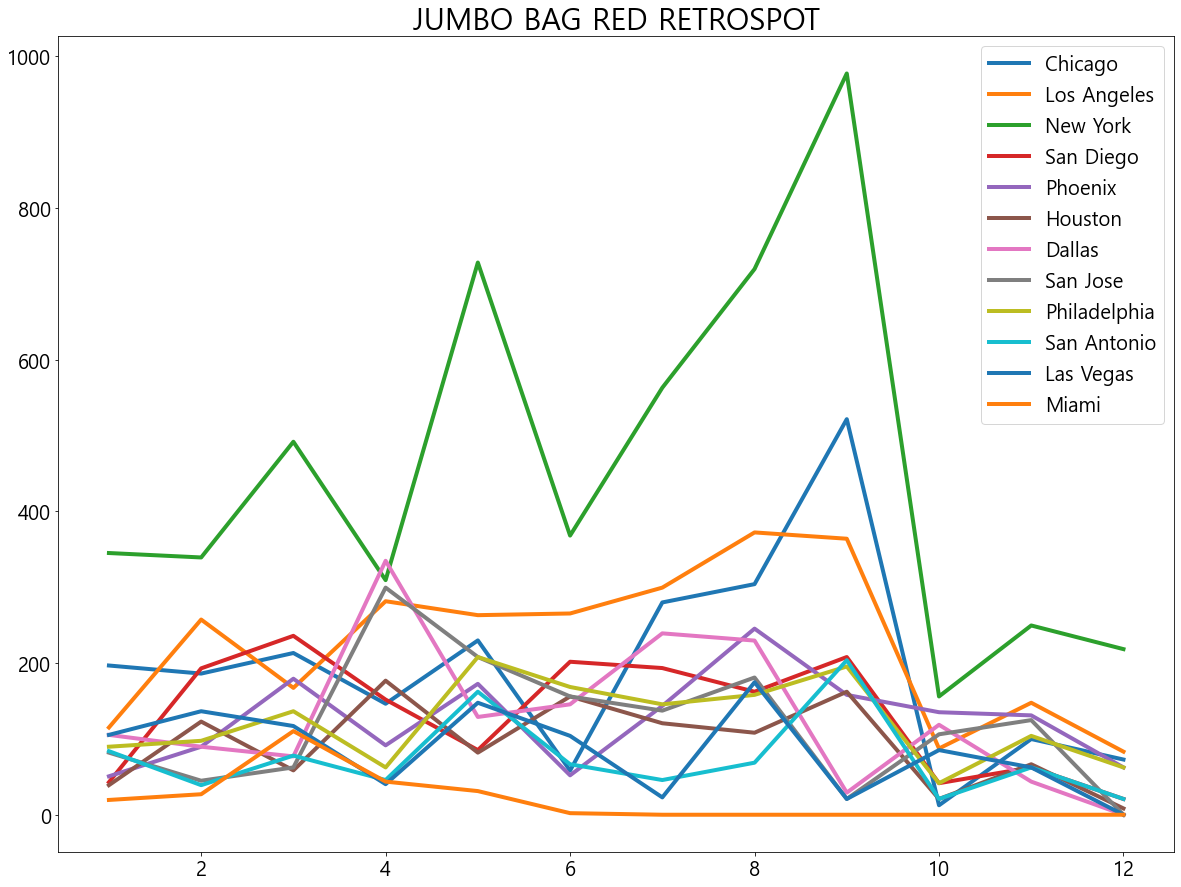

In [173]:
plt.figure(figsize= (20,15))
plt.plot(cp1['month'],cp1['sales'],label = 'Chicago', linewidth='4' )
plt.plot(cp1['month'],cp2['sales'],label = 'Los Angeles', linewidth='4' )
plt.plot(cp1['month'],cp3['sales'],label = 'New York', linewidth='4' )
plt.plot(cp1['month'],cp4['sales'],label = 'San Diego', linewidth='4' )
plt.plot(cp1['month'],cp5['sales'],label = 'Phoenix', linewidth='4' )
plt.plot(cp1['month'],cp6['sales'],label = 'Houston', linewidth='4' )
plt.plot(cp1['month'],cp7['sales'],label = 'Dallas', linewidth='4' )
plt.plot(cp1['month'],cp8['sales'],label = 'San Jose', linewidth='4' )
plt.plot(cp1['month'],cp9['sales'],label = 'Philadelphia', linewidth='4' )
plt.plot(cp1['month'],cp10['sales'],label = 'San Antonio', linewidth='4' )
plt.plot(cp1['month'],cp11['sales'],label = 'Las Vegas', linewidth='4' )
plt.plot(cp1['month'],cp12['sales'],label = 'Miami', linewidth='4' )
plt.title('JUMBO BAG RED RETROSPOT',fontsize=30)
plt.legend(fontsize = 20,loc = 'upper right')
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

In [174]:
citypro3=citypro[citypro['product_name']=='MEDIUM CERAMIC TOP STORAGE JAR']

In [177]:
cp1 = citypro3[citypro3['city']=='Chicago']

In [178]:
cp2 = citypro3[citypro3['city']=='Los Angeles']

In [179]:
cp3 = citypro3[citypro3['city']=='New York']

In [180]:
cp4 = citypro3[citypro3['city']=='San Diego']

In [181]:
cp5 = citypro3[citypro3['city']=='Phoenix']

In [182]:
cp6 = citypro3[citypro3['city']=='Houston']

In [183]:
cp7 = citypro3[citypro3['city']=='Dallas']

In [184]:
cp8 = citypro3[citypro3['city']=='San Jose']

In [185]:
cp9 = citypro3[citypro3['city']=='Philadelphia']

In [186]:
cp10 = citypro3[citypro3['city']=='San Antonio']

In [187]:
cp11 = citypro3[citypro3['city']=='Las Vegas']

In [188]:
cp12 = citypro3[citypro3['city']=='Miami']

ValueError: x and y must have same first dimension, but have shapes (8,) and (6,)

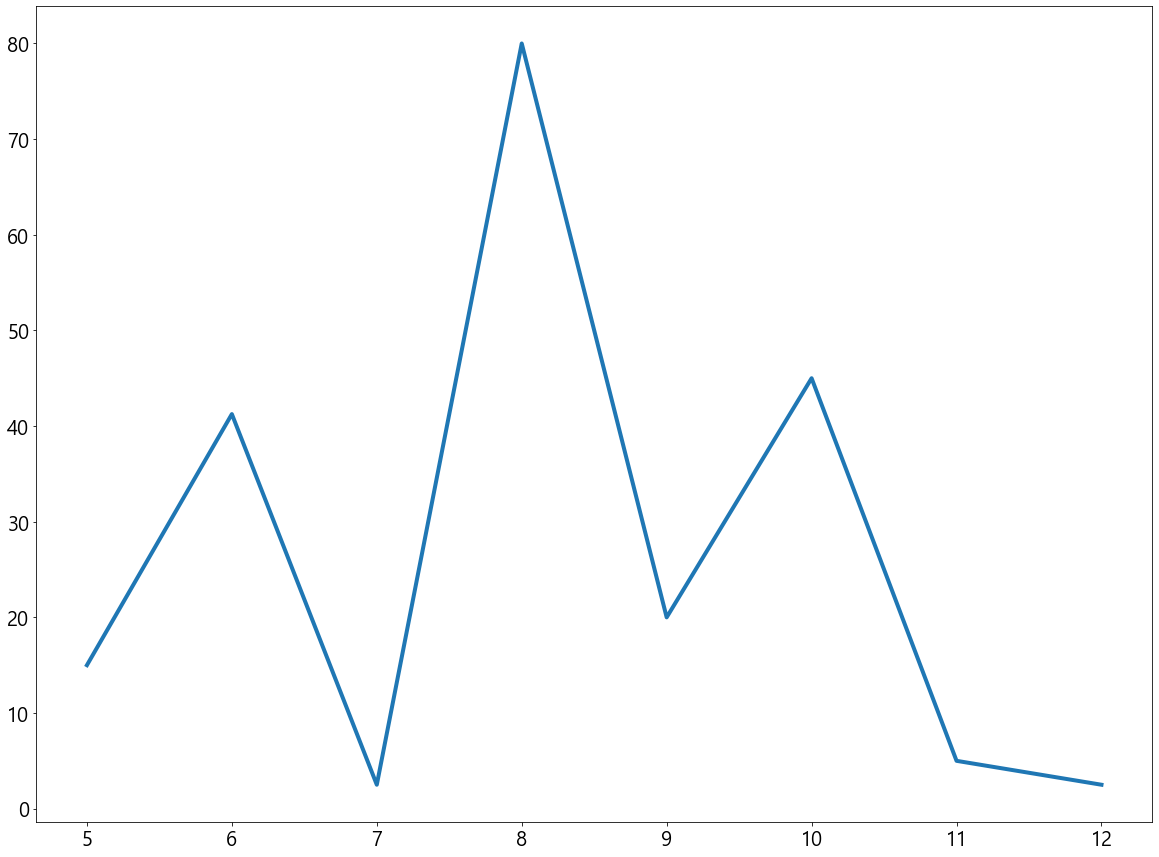

In [189]:
plt.figure(figsize= (20,15))
plt.plot(cp1['month'],cp1['sales'],label = 'Chicago', linewidth='4' )
plt.plot(cp1['month'],cp2['sales'],label = 'Los Angeles', linewidth='4' )
plt.plot(cp1['month'],cp3['sales'],label = 'New York', linewidth='4' )
plt.plot(cp1['month'],cp4['sales'],label = 'San Diego', linewidth='4' )
plt.plot(cp1['month'],cp5['sales'],label = 'Phoenix', linewidth='4' )
plt.plot(cp1['month'],cp6['sales'],label = 'Houston', linewidth='4' )
plt.plot(cp1['month'],cp7['sales'],label = 'Dallas', linewidth='4' )
plt.plot(cp1['month'],cp8['sales'],label = 'San Jose', linewidth='4' )
plt.plot(cp1['month'],cp9['sales'],label = 'Philadelphia', linewidth='4' )
plt.plot(cp1['month'],cp10['sales'],label = 'San Antonio', linewidth='4' )
plt.plot(cp1['month'],cp11['sales'],label = 'Las Vegas', linewidth='4' )
plt.plot(cp1['month'],cp12['sales'],label = 'Miami', linewidth='4' )
plt.title('MEDIUM CERAMIC TOP STORAGE JAR',fontsize=30)
plt.legend(fontsize = 20,loc = 'upper right')
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.show()

In [190]:
cp2

,month,city,product_name,sales
39586,5,Los Angeles,MEDIUM CERAMIC TOP STORAGE JAR,143.67
49893,6,Los Angeles,MEDIUM CERAMIC TOP STORAGE JAR,68.75
59761,7,Los Angeles,MEDIUM CERAMIC TOP STORAGE JAR,30.00
70022,8,Los Angeles,MEDIUM CERAMIC TOP STORAGE JAR,75.00
81442,9,Los Angeles,MEDIUM CERAMIC TOP STORAGE JAR,32.50
98954,11,Los Angeles,MEDIUM CERAMIC TOP STORAGE JAR,31.25


In [486]:
weighted_sales = pd.merge(left = sales[['product_name', 'sales','date']], right = stock, how = 'left', on = 'product_name')
weighted_sales['profit'] = weighted_sales['sales'] * weighted_sales['stock_type'].map({'consignment' : 0.1, 'buying' : 0.3})
weighted_sales

,product_name,sales,date,stock_type,profit
0,JUMBO BAG PINK POLKADOT,19.5,2021-01-04,consignment,1.95
1,BLUE POLKADOT WRAP,10.5,2021-01-04,consignment,1.05
2,RED RETROSPOT WRAP,10.5,2021-01-04,consignment,1.05
3,RECYCLING BAG RETROSPOT,10.5,2021-01-04,consignment,1.05
4,RED RETROSPOT SHOPPER BAG,12.5,2021-01-04,consignment,1.25
...,...,...,...,...,...
258637,FAIRY TALE COTTAGE NIGHT LIGHT,23.4,2021-12-09,buying,7.02
258638,LARGE CAKE STAND HANGING STRAWBERY,23.6,2021-12-09,buying,7.08
258639,SET OF 3 HANGING OWLS OLLIE BEAK,30.0,2021-12-09,consignment,3.00
258640,RED RETROSPOT ROUND CAKE TINS,214.8,2021-12-09,consignment,21.48


In [489]:
weighted_sales['date']= pd.to_datetime(weighted_sales['date'])

In [491]:
salesdata1= weighted_sales.groupby(['date'])['profit'].sum()
salesdata1 = pd.DataFrame(salesdata1)
salesdata1.reset_index(inplace = True)
salesdata1.set_index('date', inplace= True)
salesdata1

,profit
date,
2021-01-04,1176.663
2021-01-05,3143.241
2021-01-06,2892.421
2021-01-07,1877.811
2021-01-09,1629.461
...,...
2021-12-05,6122.918
2021-12-06,4471.428
2021-12-07,5324.554


In [492]:
saledata1=salesdata1.rolling(window=8).mean()

<AxesSubplot:xlabel='date'>

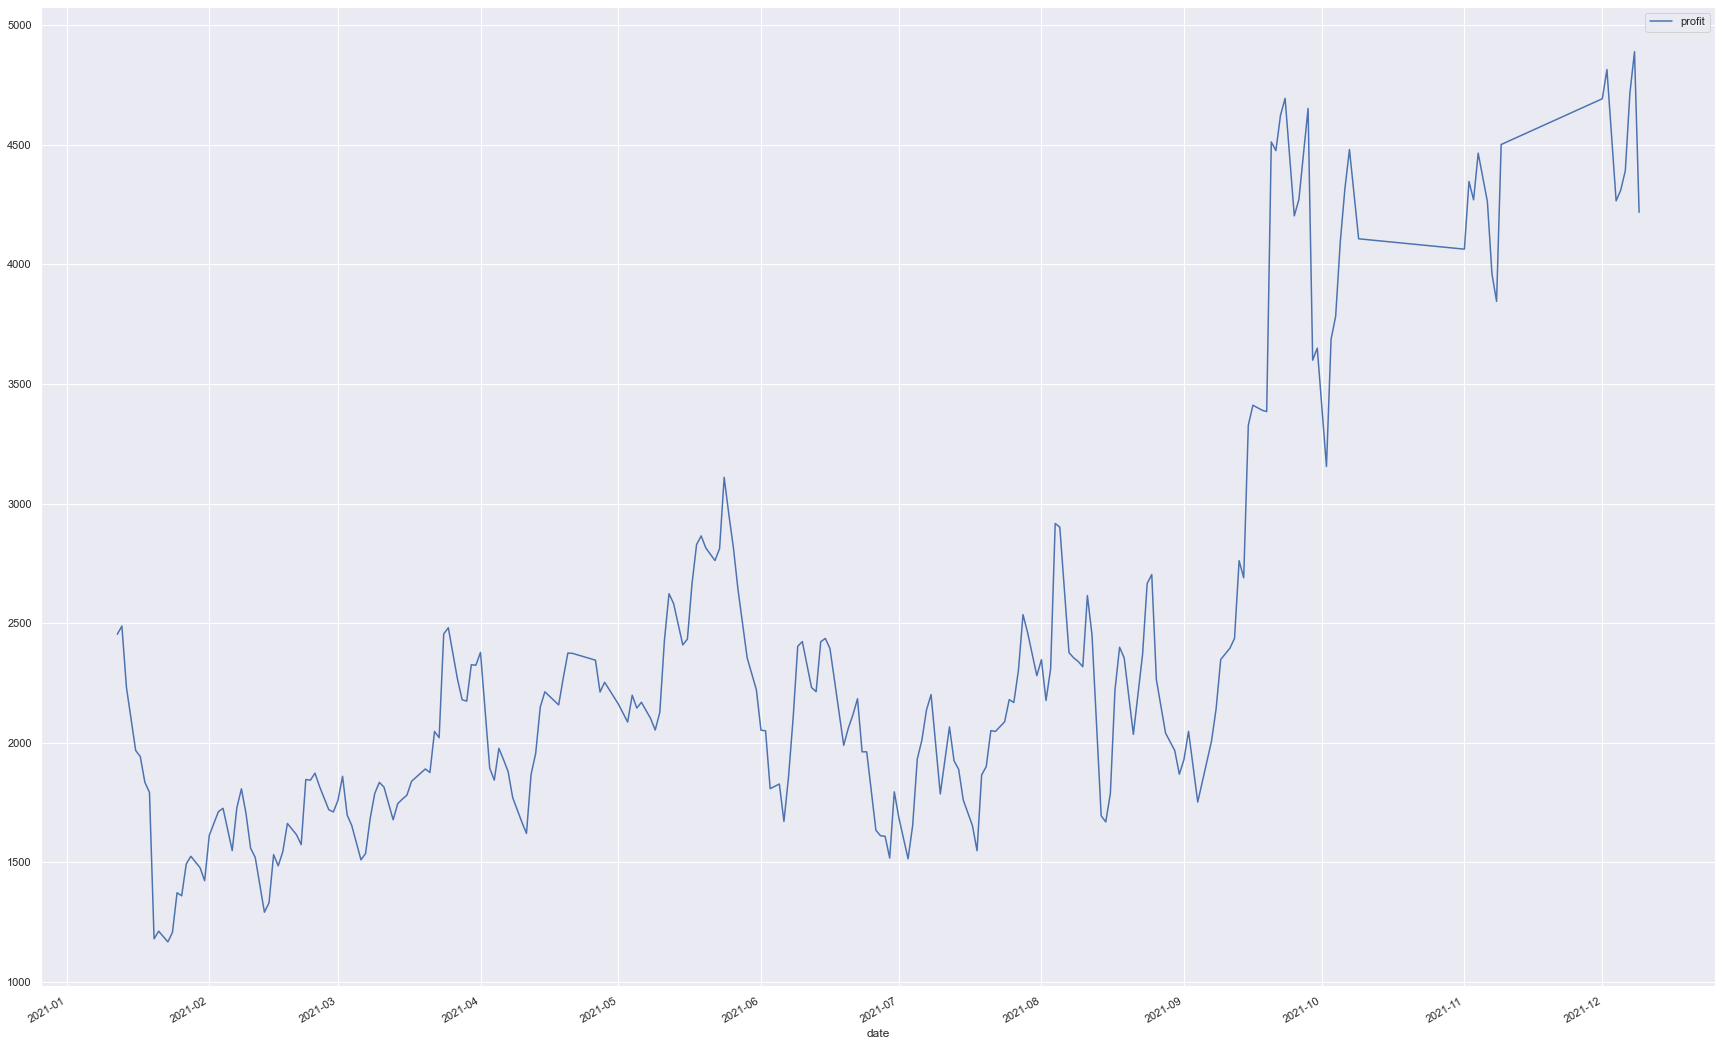

In [494]:
saledata1.plot(y='profit', figsize=(30,20))

In [503]:
salesdata

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252752,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying,12,4
252753,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying,12,4
252754,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4
252755,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4


In [527]:
allpie = salesdata['product_name'].value_counts().head(5)
allpie

WHITE HANGING HEART T-LIGHT HOLDER    1465
PARTY BUNTING                         1184
JUMBO BAG RED RETROSPOT               1144
REGENCY CAKESTAND 3 TIER              1120
ASSORTED COLOUR BIRD ORNAMENT          996
Name: product_name, dtype: int64

<AxesSubplot:ylabel='product_name'>

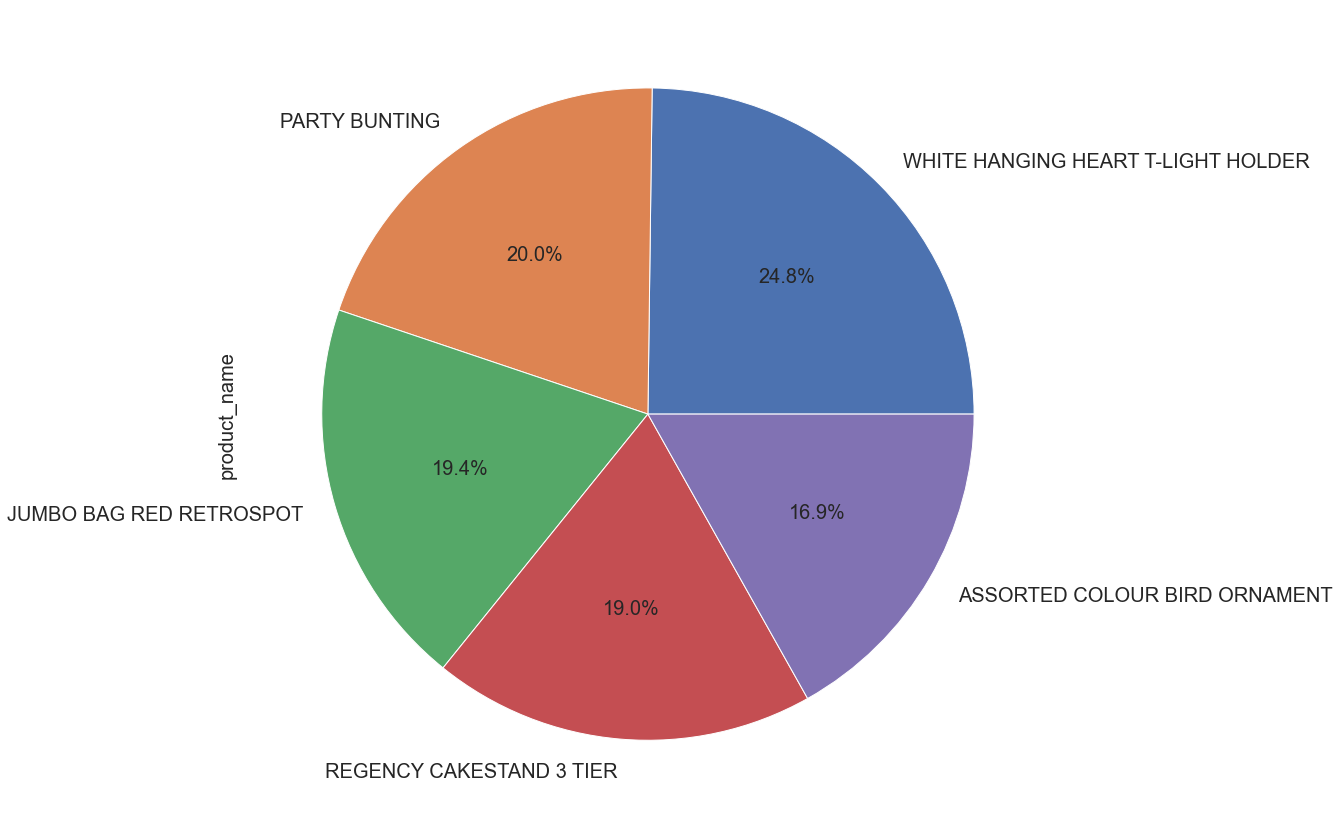

In [528]:
plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

allpie.plot.pie(y='oxy',autopct = '%.1f%%')

In [534]:
salesdata = pd.read_csv("mergesales.csv")

In [535]:
salesdata

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252752,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying,12,4
252753,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying,12,4
252754,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4
252755,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4


In [537]:
salesdata[salesdata['quantity']<=50]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252752,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying,12,4
252753,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying,12,4
252754,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4
252755,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4


In [538]:
salesdata=salesdata[salesdata['quantity']<=50]

In [539]:
salesdata['date']=pd.to_datetime(salesdata['date'])

<ipython-input-539-6c30fcce755c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesdata['date']=pd.to_datetime(salesdata['date'])


In [541]:
salesdata['week'] = salesdata['date'].dt.week

<ipython-input-541-b6f986530f2a>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  salesdata['week'] = salesdata['date'].dt.week
<ipython-input-541-b6f986530f2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesdata['week'] = salesdata['date'].dt.week


In [542]:
salesdata

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month,quarter,week
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252752,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2021-12-09,1.95,E15804,23.4,New York,NY,8177,778,big,metro,east,buying,12,4,49
252753,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2021-12-09,2.95,E13113,23.6,San Antonio,TX,1598,1291,middle,other,south,buying,12,4,49
252754,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2021-12-09,1.25,E13113,30.0,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49
252755,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2021-12-09,8.95,E13113,214.8,San Antonio,TX,1598,1291,middle,other,south,consignment,12,4,49


In [544]:
salesdata.to_csv('mergesales.csv',index = False)

In [545]:
salesdata = pd.read_csv("whole_sale.csv")

In [546]:
salesdata=salesdata[salesdata['quantity']<=50]

In [547]:
salesdata['date']=pd.to_datetime(salesdata['date'])

In [548]:
salesdata['week'] = salesdata['date'].dt.week

<ipython-input-548-b6f986530f2a>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  salesdata['week'] = salesdata['date'].dt.week


In [550]:
salesdata.to_csv('whole_sale.csv',index = False)

In [553]:
salesdata1= salesdata.groupby(['date'])['sales'].sum()
salesdata1 = pd.DataFrame(salesdata1)
salesdata1.reset_index(inplace = True)
salesdata1

,date,sales
0,2021-01-04,10286.03
1,2021-01-05,15886.51
2,2021-01-06,20816.20
3,2021-01-07,11634.92
4,2021-01-09,12312.10
...,...,...
243,2021-12-05,42288.70
244,2021-12-06,26674.58
245,2021-12-07,26084.64
246,2021-12-08,28924.10


TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

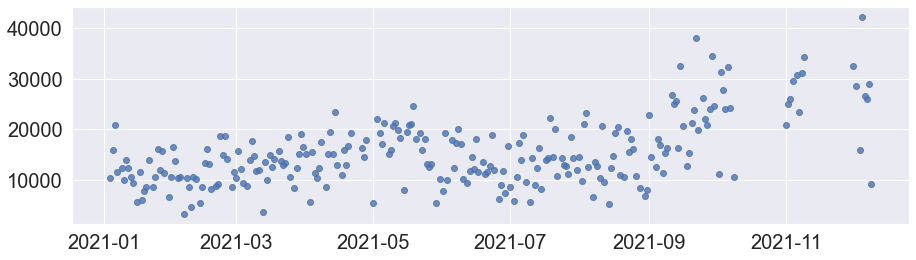

In [554]:
# regplot - 회귀선을 그려줍니다.
plt.figure(figsize=(15, 4))
sns.regplot(data=salesdata1, x="date", y="sales")

In [ ]:
# regplot - 회귀선을 그려줍니다.

plt.figure(figsize=(15, 4))
sns.regplot(data=salesdata, x="date", y="")

In [ ]:
allpie = salesdata['product_name'].value_counts().head(5)
allpie
asdf = []

In [ ]:
plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

asdf.plot.pie(y='oxy',autopct = '%.1f%%')

In [ ]:
#B1편도훈